In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 1. Importing Data Files

In [2]:
house_price=pd.read_csv("U.S. National Home Price Index.csv")

In [3]:
house_price

DATE  CSUSHPINSA
0    2000-01-01     100.000
1    2000-02-01     100.571
2    2000-03-01     101.466
3    2000-04-01     102.541
4    2000-05-01     103.702
..          ...         ...
280  2023-05-01     305.410
281  2023-06-01     308.282
282  2023-07-01     310.110
283  2023-08-01     311.392
284  2023-09-01     312.313

[285 rows x 2 columns]

In [4]:
unemploy=pd.read_csv("Unemployment rate.csv")

In [5]:
unemploy

DATE  UNRATE
0    2000-01-01     4.0
1    2000-02-01     4.1
2    2000-03-01     4.0
3    2000-04-01     3.8
4    2000-05-01     4.0
..          ...     ...
282  2023-07-01     3.5
283  2023-08-01     3.8
284  2023-09-01     3.8
285  2023-10-01     3.9
286  2023-11-01     3.7

[287 rows x 2 columns]

In [6]:
house_price['unemployment_rate']=unemploy['UNRATE']

In [7]:
house_price

DATE  CSUSHPINSA  unemployment_rate
0    2000-01-01     100.000                4.0
1    2000-02-01     100.571                4.1
2    2000-03-01     101.466                4.0
3    2000-04-01     102.541                3.8
4    2000-05-01     103.702                4.0
..          ...         ...                ...
280  2023-05-01     305.410                3.7
281  2023-06-01     308.282                3.6
282  2023-07-01     310.110                3.5
283  2023-08-01     311.392                3.8
284  2023-09-01     312.313                3.8

[285 rows x 3 columns]

In [8]:
population_us=pd.read_csv('Population of usa.csv')

In [9]:
population_us

DATE    POPTHM
0    2000-01-01  281083.0
1    2000-02-01  281299.0
2    2000-03-01  281531.0
3    2000-04-01  281763.0
4    2000-05-01  281996.0
..          ...       ...
281  2023-06-01  335163.0
282  2023-07-01  335329.0
283  2023-08-01  335501.0
284  2023-09-01  335675.0
285  2023-10-01  335836.0

[286 rows x 2 columns]

In [10]:
house_price['population_of_usa']=population_us['POPTHM']

In [11]:
house_price

DATE  CSUSHPINSA  unemployment_rate  population_of_usa
0    2000-01-01     100.000                4.0           281083.0
1    2000-02-01     100.571                4.1           281299.0
2    2000-03-01     101.466                4.0           281531.0
3    2000-04-01     102.541                3.8           281763.0
4    2000-05-01     103.702                4.0           281996.0
..          ...         ...                ...                ...
280  2023-05-01     305.410                3.7           335013.0
281  2023-06-01     308.282                3.6           335163.0
282  2023-07-01     310.110                3.5           335329.0
283  2023-08-01     311.392                3.8           335501.0
284  2023-09-01     312.313                3.8           335675.0

[285 rows x 4 columns]

In [12]:
mor=pd.read_csv('MORTGAGE30US.csv')

In [13]:
mor.sort_values(by='DATE',ascending=True)

DATE  MORTGAGE30US
0     2000-01-07          8.15
1     2000-01-14          8.18
2     2000-01-21          8.26
3     2000-01-28          8.25
4     2000-02-04          8.25
...          ...           ...
1244  2023-11-09          7.50
1245  2023-11-16          7.44
1246  2023-11-22          7.29
1247  2023-11-30          7.22
1248  2023-12-07          7.03

[1249 rows x 2 columns]

In [14]:
mor['DATE']=pd.to_datetime(mor['DATE'])

In [15]:
mor

DATE  MORTGAGE30US
0    2000-01-07          8.15
1    2000-01-14          8.18
2    2000-01-21          8.26
3    2000-01-28          8.25
4    2000-02-04          8.25
...         ...           ...
1244 2023-11-09          7.50
1245 2023-11-16          7.44
1246 2023-11-22          7.29
1247 2023-11-30          7.22
1248 2023-12-07          7.03

[1249 rows x 2 columns]

In [16]:
mor['DayOfMonth']=mor['DATE'].dt.day

In [17]:
mor

DATE  MORTGAGE30US  DayOfMonth
0    2000-01-07          8.15           7
1    2000-01-14          8.18          14
2    2000-01-21          8.26          21
3    2000-01-28          8.25          28
4    2000-02-04          8.25           4
...         ...           ...         ...
1244 2023-11-09          7.50           9
1245 2023-11-16          7.44          16
1246 2023-11-22          7.29          22
1247 2023-11-30          7.22          30
1248 2023-12-07          7.03           7

[1249 rows x 3 columns]

In [18]:
result_df=mor.groupby([mor['DATE'].dt.year,mor['DATE'].dt.month])['DATE'].idxmin().apply(lambda x: mor.loc[x])

In [19]:
result_df

DATE  MORTGAGE30US  DayOfMonth
DATE DATE                                     
2000 1    2000-01-07          8.15           7
     2    2000-02-04          8.25           4
     3    2000-03-03          8.27           3
     4    2000-04-07          8.20           7
     5    2000-05-05          8.28           5
...              ...           ...         ...
2023 8    2023-08-03          6.90           3
     9    2023-09-07          7.12           7
     10   2023-10-05          7.49           5
     11   2023-11-02          7.76           2
     12   2023-12-07          7.03           7

[288 rows x 3 columns]

In [20]:
result_df['DATE']

DATE  DATE
2000  1      2000-01-07
      2      2000-02-04
      3      2000-03-03
      4      2000-04-07
      5      2000-05-05
                ...    
2023  8      2023-08-03
      9      2023-09-07
      10     2023-10-05
      11     2023-11-02
      12     2023-12-07
Name: DATE, Length: 288, dtype: datetime64[ns]

In [21]:
house_price['mortgage_rate']=mor['MORTGAGE30US']

In [22]:
house_price

DATE  CSUSHPINSA  unemployment_rate  population_of_usa  \
0    2000-01-01     100.000                4.0           281083.0   
1    2000-02-01     100.571                4.1           281299.0   
2    2000-03-01     101.466                4.0           281531.0   
3    2000-04-01     102.541                3.8           281763.0   
4    2000-05-01     103.702                4.0           281996.0   
..          ...         ...                ...                ...   
280  2023-05-01     305.410                3.7           335013.0   
281  2023-06-01     308.282                3.6           335163.0   
282  2023-07-01     310.110                3.5           335329.0   
283  2023-08-01     311.392                3.8           335501.0   
284  2023-09-01     312.313                3.8           335675.0   

     mortgage_rate  
0             8.15  
1             8.18  
2             8.26  
3             8.25  
4             8.25  
..             ...  
280           5.71  
281           5.65  
282           5.62  
283           5.56  
284           5.63  

[285 rows x 5 columns]

In [23]:
inflation=pd.read_excel(r'\Users\Admin\Downloads\Inflation rate of USA.xlsx')

In [24]:
inflation

Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct               Nov  \
0   2000  2.7  3.2  3.8  3.1  3.2  3.7  3.7  3.4  3.5  3.4               3.4   
1   2001  3.7  3.5  2.9  3.3  3.6  3.2  2.7  2.7  2.6  2.1               1.9   
2   2002  1.1  1.1  1.5  1.6  1.2  1.1  1.5  1.8  1.5  2.0               2.2   
3   2003  2.6  3.0  3.0  2.2  2.1  2.1  2.1  2.2  2.3  2.0               1.8   
4   2004  1.9  1.7  1.7  2.3  3.1  3.3  3.0  2.7  2.5  3.2               3.5   
5   2005  3.0  3.0  3.1  3.5  2.8  2.5  3.2  3.6  4.7  4.3               3.5   
6   2006  4.0  3.6  3.4  3.5  4.2  4.3  4.1  3.8  2.1  1.3                 2   
7   2007  2.1  2.4  2.8  2.6  2.7  2.7  2.4  2.0  2.8  3.5               4.3   
8   2008  4.3  4.0  4.0  3.9  4.2  5.0  5.6  5.4  4.9  3.7               1.1   
9   2009  0.0  0.2 -0.4 -0.7 -1.3 -1.4 -2.1 -1.5 -1.3 -0.2               1.8   
10  2010  2.6  2.1  2.3  2.2  2.0  1.1  1.2  1.1  1.1  1.2               1.1   
11  2011  1.6  2.1  2.7  3.2  3.6  3.6  3.6  3.8  3.9  3.5               3.4   
12  2012  2.9  2.9  2.7  2.3  1.7  1.7  1.4  1.7  2.0  2.2               1.8   
13  2013  1.6  2.0  1.5  1.1  1.4  1.8  2.0  1.5  1.2  1.0               1.2   
14  2014  1.6  1.1  1.5  2.0  2.1  2.1  2.0  1.7  1.7  1.7               1.3   
15  2015 -0.1  0.0 -0.1 -0.2  0.0  0.1  0.2  0.2  0.0  0.2               0.5   
16  2016  1.4  1.0  0.9  1.1  1.0  1.0  0.8  1.1  1.5  1.6               1.7   
17  2017  2.5  2.7  2.4  2.2  1.9  1.6  1.7  1.9  2.2  2.0               2.2   
18  2018  2.1  2.2  2.4  2.5  2.8  2.9  2.9  2.7  2.3  2.5               2.2   
19  2019  1.6  1.5  1.9  2.0  1.8  1.6  1.8  1.7  1.7  1.8               2.1   
20  2020  2.5  2.3  1.5  0.3  0.1  0.6  1.0  1.3  1.4  1.2               1.2   
21  2021  1.4  1.7  2.6  4.2  5.0  5.4  5.4  5.3  5.4  6.2               6.8   
22  2022  7.5  7.9  8.5  8.3  8.6  9.1  8.5  8.3  8.2  7.7               7.1   
23  2023  6.4  6.0  5.0  4.9  4.0  3.0  3.2  3.7  3.7  3.2  Avail.\nDec.\n12   

    Dec  Ave  
0   3.4  3.4  
1   1.6  2.8  
2   2.4  1.6  
3   1.9  2.3  
4   3.3  2.7  
5   3.4  3.4  
6   2.5  3.2  
7   4.1  2.8  
8   0.1  3.8  
9   2.7 -0.4  
10  1.5  1.6  
11  3.0  3.2  
12  1.7  2.1  
13  1.5  1.5  
14  0.8  1.6  
15  0.7  0.1  
16  2.1  1.3  
17  2.1  2.1  
18  1.9  2.4  
19  2.3  1.8  
20  1.4  1.2  
21  7.0  4.7  
22  6.5  8.0  
23  NaN  NaN

In [25]:
inflation=pd.read_csv(r"C:\Users\Admin\Desktop\US Housing\Inflation rate of USA.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_21416\1532359645.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  inflation=pd.read_csv(r"C:\Users\Admin\Desktop\US Housing\Inflation rate of USA.csv")


In [26]:
inflation

DATE Inflation  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0    01-01-2000       2.7         NaN         NaN         NaN         NaN   
1    01-02-2000       3.2         NaN         NaN         NaN         NaN   
2    01-03-2000       3.8         NaN         NaN         NaN         NaN   
3    01-04-2000       3.1         NaN         NaN         NaN         NaN   
4    01-05-2000       3.2         NaN         NaN         NaN         NaN   
..          ...       ...         ...         ...         ...         ...   
298         NaN       NaN         NaN         NaN         NaN         NaN   
299         NaN       NaN         NaN         NaN         NaN         NaN   
300         NaN       NaN         NaN         NaN         NaN         NaN   
301         NaN       NaN         NaN         NaN         NaN         NaN   
302         NaN       NaN         NaN         NaN         NaN         NaN   

     Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 16374  \
0           NaN         NaN         NaN         NaN  ...             NaN   
1           NaN         NaN         NaN         NaN  ...             NaN   
2           NaN         NaN         NaN         NaN  ...             NaN   
3           NaN         NaN         NaN         NaN  ...             NaN   
4           NaN         NaN         NaN         NaN  ...             NaN   
..          ...         ...         ...         ...  ...             ...   
298         NaN         NaN         NaN         NaN  ...             NaN   
299         NaN         NaN         NaN         NaN  ...             NaN   
300         NaN         NaN         NaN         NaN  ...             NaN   
301         NaN         NaN         NaN         NaN  ...             NaN   
302         NaN         NaN         NaN         NaN  ...             NaN   

     Unnamed: 16375  Unnamed: 16376  Unnamed: 16377  Unnamed: 16378  \
0               NaN             NaN             NaN             NaN   
1               NaN             NaN             NaN             NaN   
2               NaN             NaN             NaN             NaN   
3               NaN             NaN             NaN             NaN   
4               NaN             NaN             NaN             NaN   
..              ...             ...             ...             ...   
298             NaN             NaN             NaN             NaN   
299             NaN             NaN             NaN             NaN   
300             NaN             NaN             NaN             NaN   
301             NaN             NaN             NaN             NaN   
302             NaN             NaN             NaN             NaN   

     Unnamed: 16379  Unnamed: 16380  Unnamed: 16381  Unnamed: 16382  \
0               NaN             NaN             NaN             NaN   
1               NaN             NaN             NaN             NaN   
2               NaN             NaN             NaN             NaN   
3               NaN             NaN             NaN             NaN   
4               NaN             NaN             NaN             NaN   
..              ...             ...             ...             ...   
298             NaN             NaN             NaN             NaN   
299             NaN             NaN             NaN             NaN   
300             NaN             NaN             NaN             NaN   
301             NaN             NaN             NaN             NaN   
302             NaN             NaN             NaN             NaN   

     Unnamed: 16383  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
..              ...  
298             NaN  
299             NaN  
300             NaN  
301             NaN  
302             NaN  

[303 rows x 16384 columns]

In [27]:
inflation.iloc[:288,:2]

DATE         Inflation
0    01-01-2000               2.7
1    01-02-2000               3.2
2    01-03-2000               3.8
3    01-04-2000               3.1
4    01-05-2000               3.2
..          ...               ...
283  01-08-2023               3.7
284  01-09-2023               3.7
285  01-10-2023               3.2
286         NaN  Avail.\nDec.\n12
287         NaN               NaN

[288 rows x 2 columns]

In [28]:
house_price['inflation']=inflation['Inflation']

In [29]:
house_price

DATE  CSUSHPINSA  unemployment_rate  population_of_usa  \
0    2000-01-01     100.000                4.0           281083.0   
1    2000-02-01     100.571                4.1           281299.0   
2    2000-03-01     101.466                4.0           281531.0   
3    2000-04-01     102.541                3.8           281763.0   
4    2000-05-01     103.702                4.0           281996.0   
..          ...         ...                ...                ...   
280  2023-05-01     305.410                3.7           335013.0   
281  2023-06-01     308.282                3.6           335163.0   
282  2023-07-01     310.110                3.5           335329.0   
283  2023-08-01     311.392                3.8           335501.0   
284  2023-09-01     312.313                3.8           335675.0   

     mortgage_rate inflation  
0             8.15       2.7  
1             8.18       3.2  
2             8.26       3.8  
3             8.25       3.1  
4             8.25       3.2  
..             ...       ...  
280           5.71         4  
281           5.65         3  
282           5.62       3.2  
283           5.56       3.7  
284           5.63       3.7  

[285 rows x 6 columns]

In [30]:
gdp=pd.read_csv(r"C:\Users\Admin\Desktop\US Housing\GDP USA.csv")

In [31]:
gdp

DATE  Monthly Nominal GDP Index  Monthly Real GDP Index  \
0    01-01-2000                   9924.234               13812.330   
1    01-02-2000                   9995.335               13871.487   
2    01-03-2000                  10086.968               13951.145   
3    01-04-2000                  10224.854               14133.207   
4    01-05-2000                  10232.034               14113.376   
..          ...                        ...                     ...   
298         NaN                        NaN                     NaN   
299         NaN                        NaN                     NaN   
300         NaN                        NaN                     NaN   
301         NaN                        NaN                     NaN   
302         NaN                        NaN                     NaN   

     Unnamed: 3  Unnamed: 4  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  
..          ...         ...  
298         NaN         NaN  
299         NaN         NaN  
300         NaN         NaN  
301         NaN         NaN  
302         NaN         NaN  

[303 rows x 5 columns]

In [32]:
gdp.iloc[:,1:3]

Monthly Nominal GDP Index  Monthly Real GDP Index
0                     9924.234               13812.330
1                     9995.335               13871.487
2                    10086.968               13951.145
3                    10224.854               14133.207
4                    10232.034               14113.376
..                         ...                     ...
298                        NaN                     NaN
299                        NaN                     NaN
300                        NaN                     NaN
301                        NaN                     NaN
302                        NaN                     NaN

[303 rows x 2 columns]

In [33]:
gdp.iloc[:,1:3].columns

Index(['Monthly Nominal GDP Index', 'Monthly Real GDP Index'], dtype='object')

In [34]:
house_price[gdp.iloc[:,1:3].columns]=gdp.iloc[:,1:3]

In [35]:
house_price

DATE  CSUSHPINSA  unemployment_rate  population_of_usa  \
0    2000-01-01     100.000                4.0           281083.0   
1    2000-02-01     100.571                4.1           281299.0   
2    2000-03-01     101.466                4.0           281531.0   
3    2000-04-01     102.541                3.8           281763.0   
4    2000-05-01     103.702                4.0           281996.0   
..          ...         ...                ...                ...   
280  2023-05-01     305.410                3.7           335013.0   
281  2023-06-01     308.282                3.6           335163.0   
282  2023-07-01     310.110                3.5           335329.0   
283  2023-08-01     311.392                3.8           335501.0   
284  2023-09-01     312.313                3.8           335675.0   

     mortgage_rate inflation  Monthly Nominal GDP Index  \
0             8.15       2.7                   9924.234   
1             8.18       3.2                   9995.335   
2             8.26       3.8                  10086.968   
3             8.25       3.1                  10224.854   
4             8.25       3.2                  10232.034   
..             ...       ...                        ...   
280           5.71         4                  27073.638   
281           5.65         3                  27195.115   
282           5.62       3.2                  27424.226   
283           5.56       3.7                  27678.307   
284           5.63       3.7                  27862.145   

     Monthly Real GDP Index  
0               13812.33000  
1               13871.48700  
2               13951.14500  
3               14133.20700  
4               14113.37600  
..                      ...  
280             22254.93500  
281             22317.31557  
282             22447.42100  
283             22537.11000  
284             22565.00900  

[285 rows x 8 columns]

In [36]:
customer_sentiment=pd.read_excel(r"C:\Users\Admin\Desktop\US Housing\Customer Sentiment USA.xlsx")

In [37]:
customer_sentiment

DATE  Customer Sentiment  Future Prospect
0   2000-01-01                  77               47
1   2000-02-01                  76               46
2   2000-03-01                  70               46
3   2000-04-01                  70               45
4   2000-05-01                  70               45
..         ...                 ...              ...
282 2023-07-01                  62               40
283 2023-08-01                  57               35
284 2023-09-01                  50               30
285 2023-10-01                  46               26
286 2023-11-01                  40               21

[287 rows x 3 columns]

In [38]:
customer_sentiment.iloc[:,1:3]

Customer Sentiment  Future Prospect
0                    77               47
1                    76               46
2                    70               46
3                    70               45
4                    70               45
..                  ...              ...
282                  62               40
283                  57               35
284                  50               30
285                  46               26
286                  40               21

[287 rows x 2 columns]

In [39]:
house_price[customer_sentiment.iloc[:,1:3].columns]=customer_sentiment.iloc[:,1:3]

In [40]:
house_price

DATE  CSUSHPINSA  unemployment_rate  population_of_usa  \
0    2000-01-01     100.000                4.0           281083.0   
1    2000-02-01     100.571                4.1           281299.0   
2    2000-03-01     101.466                4.0           281531.0   
3    2000-04-01     102.541                3.8           281763.0   
4    2000-05-01     103.702                4.0           281996.0   
..          ...         ...                ...                ...   
280  2023-05-01     305.410                3.7           335013.0   
281  2023-06-01     308.282                3.6           335163.0   
282  2023-07-01     310.110                3.5           335329.0   
283  2023-08-01     311.392                3.8           335501.0   
284  2023-09-01     312.313                3.8           335675.0   

     mortgage_rate inflation  Monthly Nominal GDP Index  \
0             8.15       2.7                   9924.234   
1             8.18       3.2                   9995.335   
2             8.26       3.8                  10086.968   
3             8.25       3.1                  10224.854   
4             8.25       3.2                  10232.034   
..             ...       ...                        ...   
280           5.71         4                  27073.638   
281           5.65         3                  27195.115   
282           5.62       3.2                  27424.226   
283           5.56       3.7                  27678.307   
284           5.63       3.7                  27862.145   

     Monthly Real GDP Index  Customer Sentiment  Future Prospect  
0               13812.33000                  77               47  
1               13871.48700                  76               46  
2               13951.14500                  70               46  
3               14133.20700                  70               45  
4               14113.37600                  70               45  
..                      ...                 ...              ...  
280             22254.93500                  56               33  
281             22317.31557                  61               37  
282             22447.42100                  62               40  
283             22537.11000                  57               35  
284             22565.00900                  50               30  

[285 rows x 10 columns]

In [41]:
house_price.columns = house_price.columns.map(lambda x: x.lower())

In [42]:
house_price.rename(columns={'future prospect': 'customer_sentiment_future_prospect'},inplace=True)

In [43]:
house_price

date  csushpinsa  unemployment_rate  population_of_usa  \
0    2000-01-01     100.000                4.0           281083.0   
1    2000-02-01     100.571                4.1           281299.0   
2    2000-03-01     101.466                4.0           281531.0   
3    2000-04-01     102.541                3.8           281763.0   
4    2000-05-01     103.702                4.0           281996.0   
..          ...         ...                ...                ...   
280  2023-05-01     305.410                3.7           335013.0   
281  2023-06-01     308.282                3.6           335163.0   
282  2023-07-01     310.110                3.5           335329.0   
283  2023-08-01     311.392                3.8           335501.0   
284  2023-09-01     312.313                3.8           335675.0   

     mortgage_rate inflation  monthly nominal gdp index  \
0             8.15       2.7                   9924.234   
1             8.18       3.2                   9995.335   
2             8.26       3.8                  10086.968   
3             8.25       3.1                  10224.854   
4             8.25       3.2                  10232.034   
..             ...       ...                        ...   
280           5.71         4                  27073.638   
281           5.65         3                  27195.115   
282           5.62       3.2                  27424.226   
283           5.56       3.7                  27678.307   
284           5.63       3.7                  27862.145   

     monthly real gdp index  customer sentiment  \
0               13812.33000                  77   
1               13871.48700                  76   
2               13951.14500                  70   
3               14133.20700                  70   
4               14113.37600                  70   
..                      ...                 ...   
280             22254.93500                  56   
281             22317.31557                  61   
282             22447.42100                  62   
283             22537.11000                  57   
284             22565.00900                  50   

     customer_sentiment_future_prospect  
0                                    47  
1                                    46  
2                                    46  
3                                    45  
4                                    45  
..                                  ...  
280                                  33  
281                                  37  
282                                  40  
283                                  35  
284                                  30  

[285 rows x 10 columns]

In [44]:
construction=pd.read_excel(r"C:\Users\Admin\Desktop\Construction status.xlsx")

In [45]:
construction

DATE  Housing units completed  Housing units under construction  \
0   2000-01-01                    110.0                             946.6   
1   2000-02-01                    116.1                             948.4   
2   2000-03-01                    130.6                             952.5   
3   2000-04-01                    124.4                             979.5   
4   2000-05-01                    136.5                             994.6   
..         ...                      ...                               ...   
283 2023-08-01                    122.1                            1711.1   
284 2023-09-01                    124.8                            1690.6   
285 2023-10-01                    122.2                            1686.7   
286 2023-11-01                      NaN                               NaN   
287        NaT                      NaN                               NaN   

     Construction spending  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
..                     ...  
283               885776.0  
284               884184.0  
285               895130.0  
286                    NaN  
287                    NaN  

[288 rows x 4 columns]

In [46]:
construction.iloc[:,1:]

Housing units completed  Housing units under construction  \
0                      110.0                             946.6   
1                      116.1                             948.4   
2                      130.6                             952.5   
3                      124.4                             979.5   
4                      136.5                             994.6   
..                       ...                               ...   
283                    122.1                            1711.1   
284                    124.8                            1690.6   
285                    122.2                            1686.7   
286                      NaN                               NaN   
287                      NaN                               NaN   

     Construction spending  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
..                     ...  
283               885776.0  
284               884184.0  
285               895130.0  
286                    NaN  
287                    NaN  

[288 rows x 3 columns]

In [47]:
house_price[construction.iloc[:,1:].columns]=construction.iloc[:,1:]

In [48]:
house_price

date  csushpinsa  unemployment_rate  population_of_usa  \
0    2000-01-01     100.000                4.0           281083.0   
1    2000-02-01     100.571                4.1           281299.0   
2    2000-03-01     101.466                4.0           281531.0   
3    2000-04-01     102.541                3.8           281763.0   
4    2000-05-01     103.702                4.0           281996.0   
..          ...         ...                ...                ...   
280  2023-05-01     305.410                3.7           335013.0   
281  2023-06-01     308.282                3.6           335163.0   
282  2023-07-01     310.110                3.5           335329.0   
283  2023-08-01     311.392                3.8           335501.0   
284  2023-09-01     312.313                3.8           335675.0   

     mortgage_rate inflation  monthly nominal gdp index  \
0             8.15       2.7                   9924.234   
1             8.18       3.2                   9995.335   
2             8.26       3.8                  10086.968   
3             8.25       3.1                  10224.854   
4             8.25       3.2                  10232.034   
..             ...       ...                        ...   
280           5.71         4                  27073.638   
281           5.65         3                  27195.115   
282           5.62       3.2                  27424.226   
283           5.56       3.7                  27678.307   
284           5.63       3.7                  27862.145   

     monthly real gdp index  customer sentiment  \
0               13812.33000                  77   
1               13871.48700                  76   
2               13951.14500                  70   
3               14133.20700                  70   
4               14113.37600                  70   
..                      ...                 ...   
280             22254.93500                  56   
281             22317.31557                  61   
282             22447.42100                  62   
283             22537.11000                  57   
284             22565.00900                  50   

     customer_sentiment_future_prospect  Housing units completed  \
0                                    47                    110.0   
1                                    46                    116.1   
2                                    46                    130.6   
3                                    45                    124.4   
4                                    45                    136.5   
..                                  ...                      ...   
280                                  33                    129.6   
281                                  37                    131.1   
282                                  40                    115.7   
283                                  35                    122.1   
284                                  30                    124.8   

     Housing units under construction  Construction spending  
0                               946.6                    NaN  
1                               948.4                    NaN  
2                               952.5                    NaN  
3                               979.5                    NaN  
4                               994.6                    NaN  
..                                ...                    ...  
280                            1695.5               864027.0  
281                            1705.8               870655.0  
282                            1717.5               865747.0  
283                            1711.1               885776.0  
284                            1690.6               884184.0  

[285 rows x 13 columns]

In [49]:
house_price[270:]

date  csushpinsa  unemployment_rate  population_of_usa  \
270  2022-07-01     307.133                3.5           333624.0   
271  2022-08-01     303.685                3.7           333799.0   
272  2022-09-01     300.503                3.5           333976.0   
273  2022-10-01     298.731                3.7           334141.0   
274  2022-11-01     296.928                3.6           334287.0   
275  2022-12-01     294.417                3.5           334420.0   
276  2023-01-01     292.849                3.4           334533.0   
277  2023-02-01     293.466                3.6           334637.0   
278  2023-03-01     297.309                3.5           334753.0   
279  2023-04-01     301.460                3.4           334880.0   
280  2023-05-01     305.410                3.7           335013.0   
281  2023-06-01     308.282                3.6           335163.0   
282  2023-07-01     310.110                3.5           335329.0   
283  2023-08-01     311.392                3.8           335501.0   
284  2023-09-01     312.313                3.8           335675.0   

     mortgage_rate inflation  monthly nominal gdp index  \
270           5.85       8.5                  25754.936   
271           5.95       8.3                  26129.189   
272           6.01       8.2                  26099.792   
273           6.04       7.7                  26287.460   
274           5.93       7.1                  26462.723   
275           5.91       6.5                  26475.032   
276           5.80       6.4                  26731.804   
277           5.78         6                  26833.580   
278           5.75         5                  26875.419   
279           5.77       4.9                  26920.282   
280           5.71         4                  27073.638   
281           5.65         3                  27195.115   
282           5.62       3.2                  27424.226   
283           5.56       3.7                  27678.307   
284           5.63       3.7                  27862.145   

     monthly real gdp index  customer sentiment  \
270             21705.91900                  64   
271             21981.69900                  57   
272             21870.02200                  54   
273             21905.26300                  45   
274             22011.02700                  39   
275             22057.84900                  36   
276             22121.56100                  40   
277             22112.62000                  47   
278             22107.15600                  49   
279             22108.63300                  51   
280             22254.93500                  56   
281             22317.31557                  61   
282             22447.42100                  62   
283             22537.11000                  57   
284             22565.00900                  50   

     customer_sentiment_future_prospect  Housing units completed  \
270                                  37                    123.5   
271                                  32                    122.2   
272                                  31                    120.4   
273                                  25                    118.1   
274                                  20                    125.1   
275                                  20                    132.0   
276                                  23                     94.8   
277                                  28                    111.7   
278                                  31                    126.4   
279                                  31                    111.3   
280                                  33                    129.6   
281                                  37                    131.1   
282                                  40                    115.7   
283                                  35                    122.1   
284                                  30                    124.8   

     Housing units under construction  Construction spe

# 2. EDA

In [50]:
house_price.describe().T

count           mean            std  \
csushpinsa                          285.0     176.049600      49.772444   
unemployment_rate                   285.0       5.786316       1.968839   
population_of_usa                   285.0  311714.877193   16543.409446   
mortgage_rate                       285.0       6.567088       0.878117   
monthly nominal gdp index           285.0   16730.019996    4551.973204   
monthly real gdp index              285.0   17744.314423    2383.751843   
customer sentiment                  285.0      55.263158      23.332356   
customer_sentiment_future_prospect  285.0      38.575439      16.390442   
Housing units completed             285.0     104.848421      35.830253   
Housing units under construction    285.0    1024.757895     333.454026   
Construction spending               261.0  500480.693487  186597.194131   

                                           min         25%         50%  \
csushpinsa                             100.000     143.169     167.021   
unemployment_rate                        3.400       4.400       5.300   
population_of_usa                   281083.000  297311.000  313260.000   
mortgage_rate                            5.210       5.820       6.310   
monthly nominal gdp index             9924.234   13437.211   15837.842   
monthly real gdp index               13812.330   16235.200   17207.586   
customer sentiment                       6.000      36.000      63.000   
customer_sentiment_future_prospect       7.000      25.000      43.000   
Housing units completed                 35.000      73.800     103.400   
Housing units under construction       408.200     810.200    1049.900   
Construction spending               244399.000  368792.000  488816.000   

                                           75%         max  
csushpinsa                             195.089     312.313  
unemployment_rate                        6.700      14.700  
population_of_usa                   327528.000  335675.000  
mortgage_rate                            7.110       8.640  
monthly nominal gdp index            19820.154   27862.145  
monthly real gdp index               19639.049   22565.009  
customer sentiment                      73.000      96.000  
customer_sentiment_future_prospect      49.000      77.000  
Housing units completed                129.500     187.500  
Housing units under construction      1204.900    1726.700  
Construction spending               587932.000  979044.000

In [51]:
house_price.duplicated().sum() #checking duplicates

0

In [52]:
house_price.isnull().sum() # Checking Null values

date                                   0
csushpinsa                             0
unemployment_rate                      0
population_of_usa                      0
mortgage_rate                          0
inflation                              0
monthly nominal gdp index              0
monthly real gdp index                 0
customer sentiment                     0
customer_sentiment_future_prospect     0
Housing units completed                0
Housing units under construction       0
Construction spending                 24
dtype: int64

In [53]:
house_price=house_price.dropna()

In [54]:
house_price.isnull().sum()

date                                  0
csushpinsa                            0
unemployment_rate                     0
population_of_usa                     0
mortgage_rate                         0
inflation                             0
monthly nominal gdp index             0
monthly real gdp index                0
customer sentiment                    0
customer_sentiment_future_prospect    0
Housing units completed               0
Housing units under construction      0
Construction spending                 0
dtype: int64

In [55]:
correction=house_price.iloc[:,1:].corr()

In [56]:
correction 

csushpinsa  unemployment_rate  \
csushpinsa                            1.000000          -0.509437   
unemployment_rate                    -0.509437           1.000000   
population_of_usa                     0.728184          -0.203304   
mortgage_rate                        -0.554711           0.117735   
inflation                             0.598620          -0.423239   
monthly nominal gdp index             0.895759          -0.365213   
monthly real gdp index                0.868761          -0.400504   
customer sentiment                    0.380132          -0.556256   
customer_sentiment_future_prospect    0.357778          -0.505711   
Housing units completed               0.212066          -0.531083   
Housing units under construction      0.750812          -0.733483   
Construction spending                 0.888377          -0.655256   

                                    population_of_usa  mortgage_rate  \
csushpinsa                                   0.728184      -0.554711   
unemployment_rate                           -0.203304       0.117735   
population_of_usa                            1.000000      -0.895491   
mortgage_rate                               -0.895491       1.000000   
inflation                                    0.168503      -0.103466   
monthly nominal gdp index                    0.945802      -0.796446   
monthly real gdp index                       0.961342      -0.823581   
customer sentiment                           0.275644      -0.204452   
customer_sentiment_future_prospect           0.272763      -0.209956   
Housing units completed                     -0.373401       0.452566   
Housing units under construction             0.197775      -0.030867   
Construction spending                        0.434186      -0.277697   

                                    inflation  monthly nominal gdp index  \
csushpinsa                           0.598620                   0.895759   
unemployment_rate                   -0.423239                  -0.365213   
population_of_usa                    0.168503                   0.945802   
mortgage_rate                       -0.103466                  -0.796446   
inflation                            1.000000                   0.388701   
monthly nominal gdp index            0.388701                   1.000000   
monthly real gdp index               0.344104                   0.990219   
customer sentiment                   0.140296                   0.332597   
customer_sentiment_future_prospect   0.125312                   0.319508   
Housing units completed              0.304978                  -0.163387   
Housing units under construction     0.566896                   0.442078   
Construction spending                0.640826                   0.653214   

                                    monthly real gdp index  \
csushpinsa                                        0.868761   
unemployment_rate                                -0.400504   
population_of_usa                                 0.961342   
mortgage_rate                                    -0.823581   
inflation                                         0.344104   
monthly nominal gdp index                         0.990219   
monthly real gdp index                            1.000000   
customer sentiment                                0.376188   
customer_sentiment_future_prospect                0.369101   
Housing units completed                          -0.162115   
Housing units under construction                  0.427391   
Construction spending                             0.636495   

                                    customer sentiment  \
csushpinsa                                    0.380132   
unemployment_rate                            -0.556256   
population_of_usa                             0.275644   
mortgage_rate                                -0.204452   
inflation                                     0.140296   
monthly nominal gdp index                     0.332597   

<Axes: >

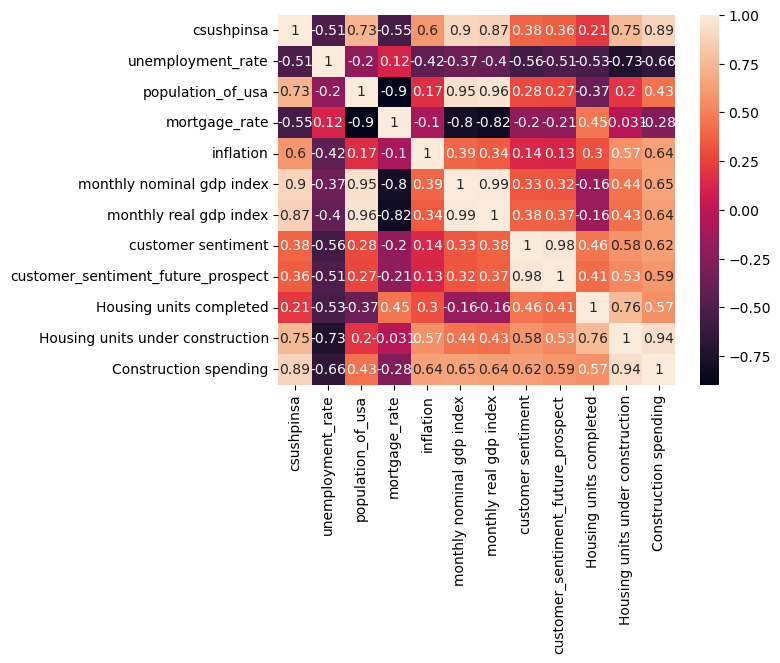

In [57]:
sns.heatmap(correction,annot=True)

In [58]:
df=house_price.iloc[:276,1:]

In [59]:
df

csushpinsa  unemployment_rate  population_of_usa  mortgage_rate  \
24      116.437                5.7           286739.0           8.14   
25      116.917                5.7           286935.0           8.22   
26      117.929                5.7           287131.0           8.16   
27      119.209                5.9           287343.0           8.09   
28      120.788                5.8           287571.0           8.21   
..          ...                ...                ...            ...   
280     305.410                3.7           335013.0           5.71   
281     308.282                3.6           335163.0           5.65   
282     310.110                3.5           335329.0           5.62   
283     311.392                3.8           335501.0           5.56   
284     312.313                3.8           335675.0           5.63   

    inflation  monthly nominal gdp index  monthly real gdp index  \
24        1.1                  10786.903             14408.69300   
25        1.1                  10748.901             14322.75100   
26        1.5                  10814.696             14388.78400   
27        1.6                  10858.427             14444.85000   
28        1.2                  10870.048             14442.52600   
..        ...                        ...                     ...   
280         4                  27073.638             22254.93500   
281         3                  27195.115             22317.31557   
282       3.2                  27424.226             22447.42100   
283       3.7                  27678.307             22537.11000   
284       3.7                  27862.145             22565.00900   

     customer sentiment  customer_sentiment_future_prospect  \
24                   61                                  47   
25                   62                                  46   
26                   67                                  48   
27                   66                                  47   
28                   67                                  45   
..                  ...                                 ...   
280                  56                                  33   
281                  61                                  37   
282                  62                                  40   
283                  57                                  35   
284                  50                                  30   

     Housing units completed  Housing units under construction  \
24                     112.3                             957.3   
25                     115.2                             960.7   
26                     121.2                             979.8   
27                     127.3                             999.8   
28                     139.4                            1024.6   
..                       ...                               ...   
280                    129.6                            1695.5   
281                    131.1                            1705.8   
282                    115.7                            1717.5   
283                    122.1                            1711.1   
284                    124.8                            1690.6   

     Construction spending  
24                382979.0  
25                391434.0  
26                390942.0  
27                404255.0  
28                399164.0  
..                     ...  
280               864027.0  
281               870655.0  
282               865747.0  
283               885776.0  
284               884184.0  

[261 rows x 12 columns]

In [60]:
df = df.fillna(0)

In [61]:
df.dtypes

csushpinsa                            float64
unemployment_rate                     float64
population_of_usa                     float64
mortgage_rate                         float64
inflation                              object
monthly nominal gdp index             float64
monthly real gdp index                float64
customer sentiment                      int64
customer_sentiment_future_prospect      int64
Housing units completed               float64
Housing units under construction      float64
Construction spending                 float64
dtype: object

In [62]:
df['inflation']=df['inflation'].astype('float') # Converting the inflation data type from object to float 

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

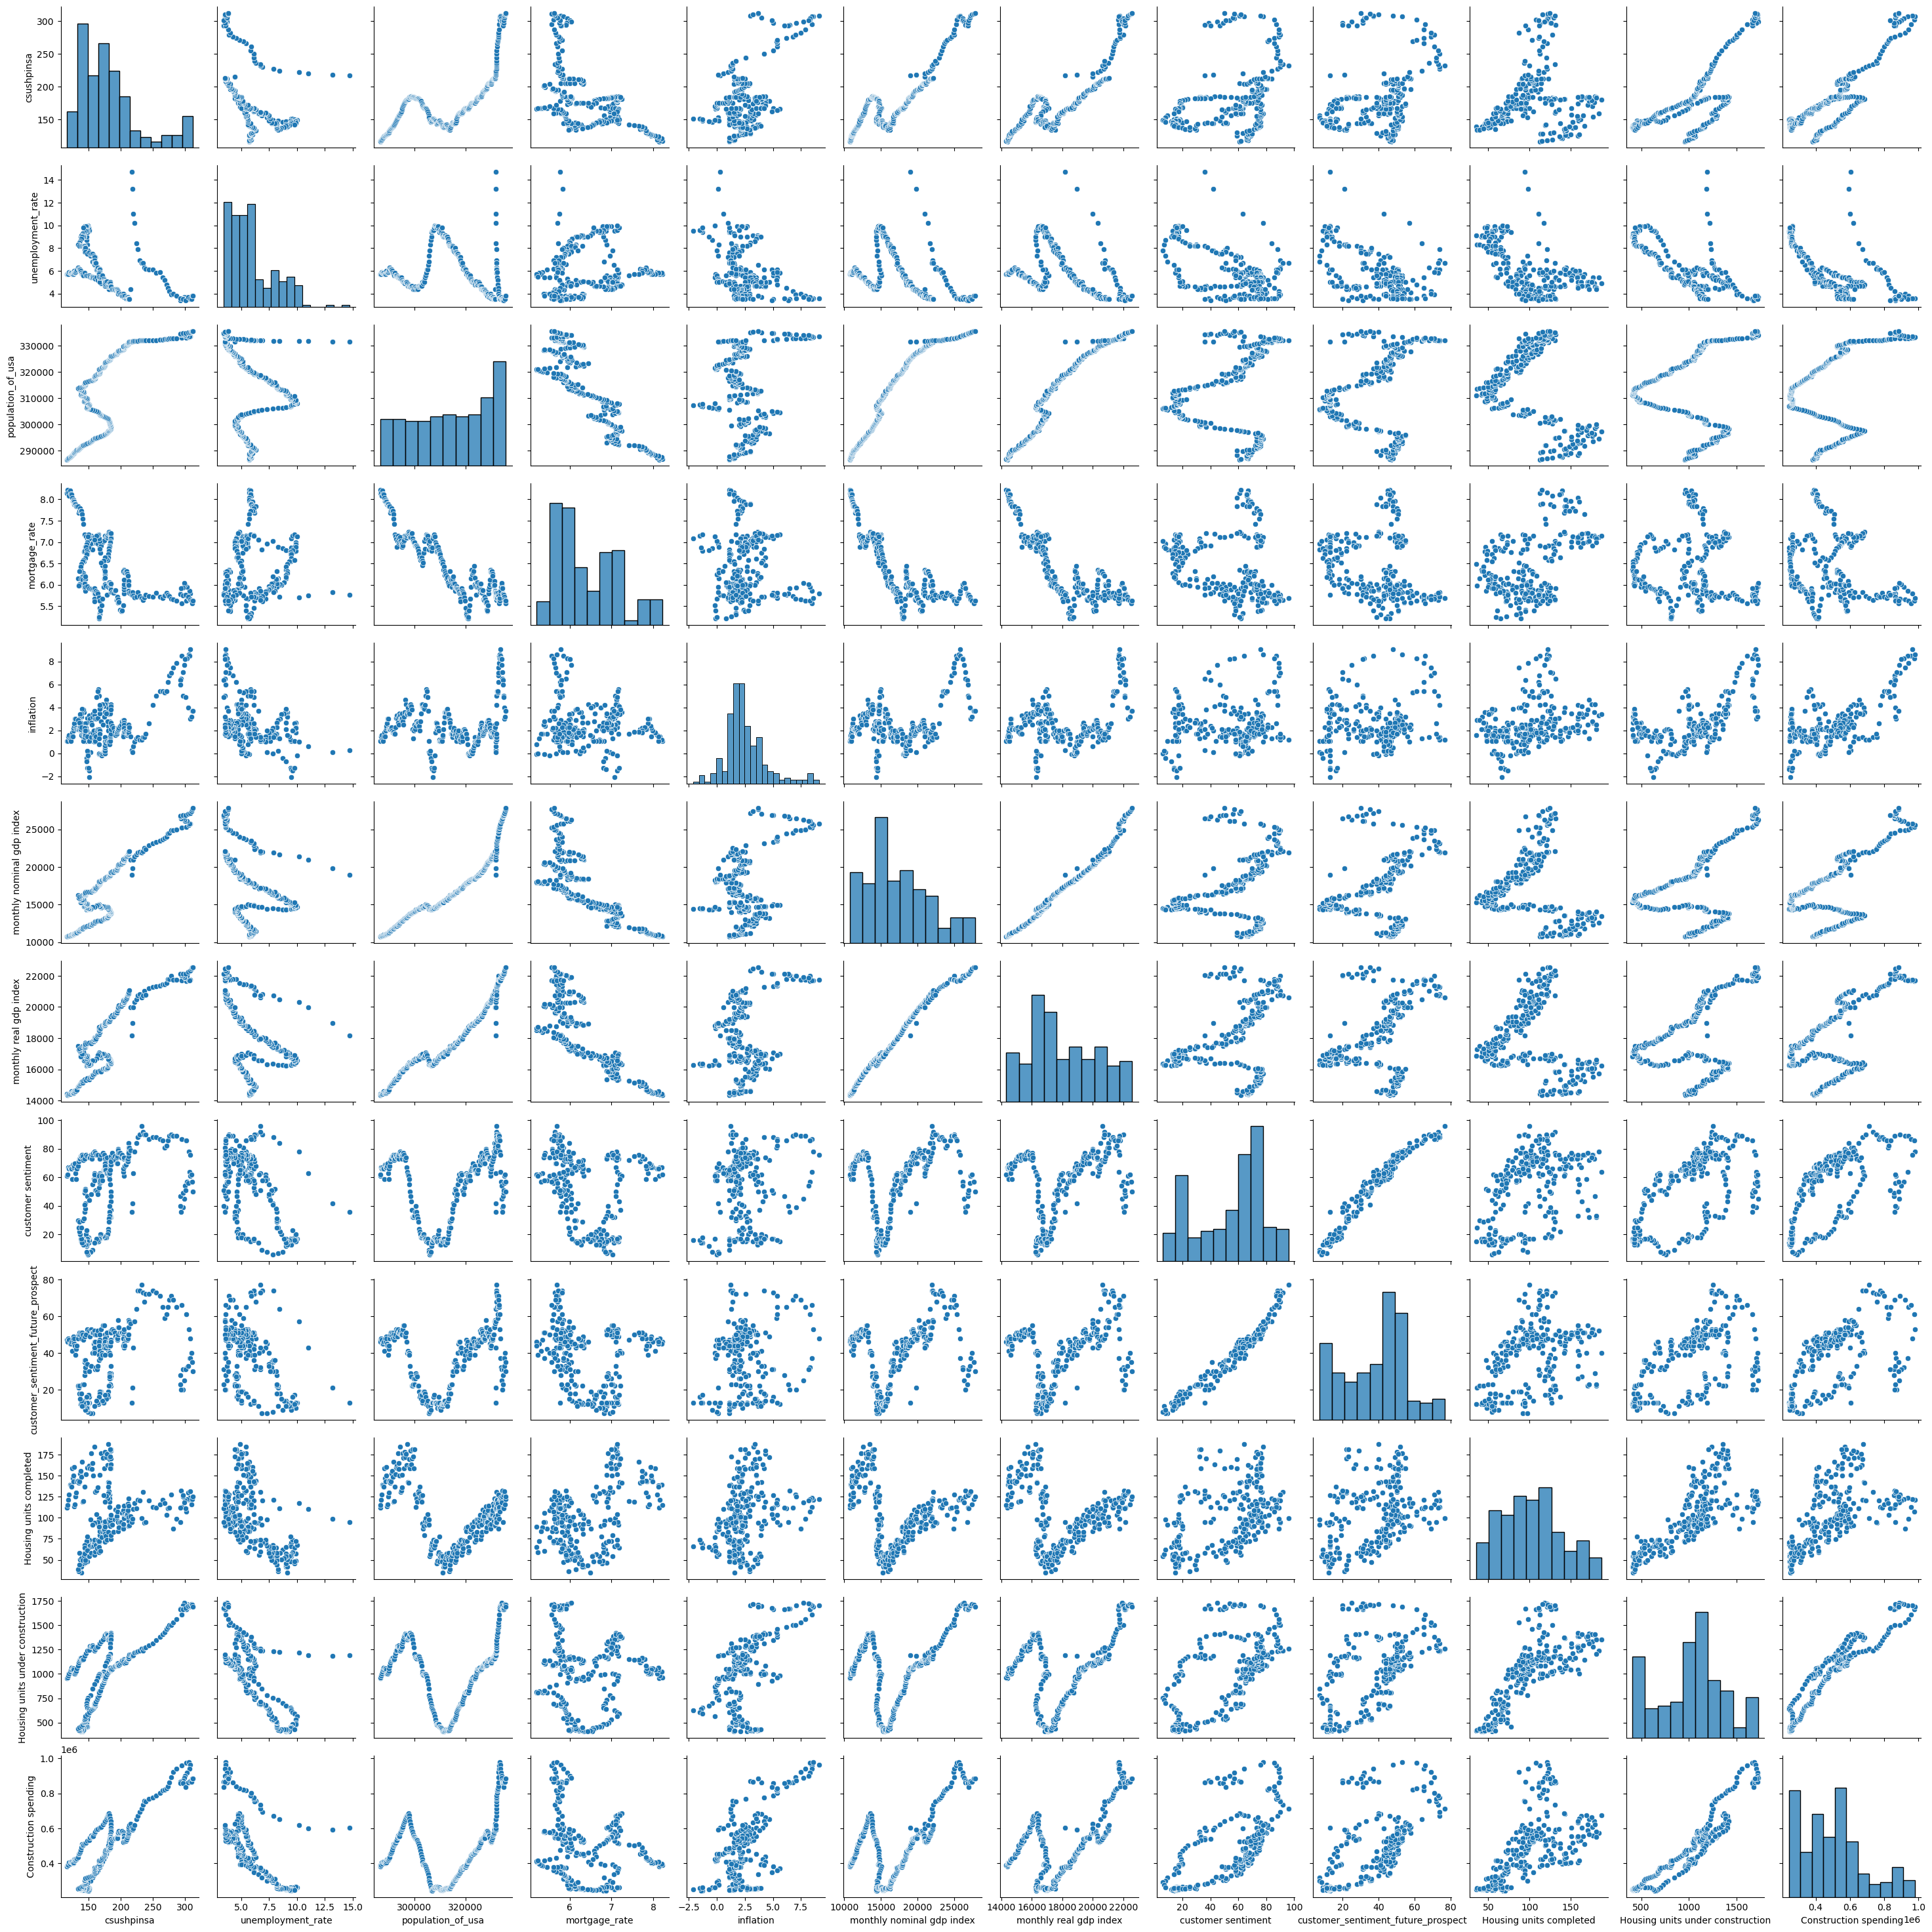

In [63]:
sns.pairplot(df)

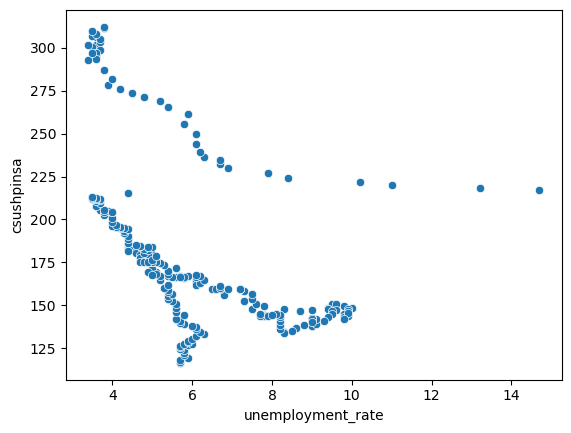

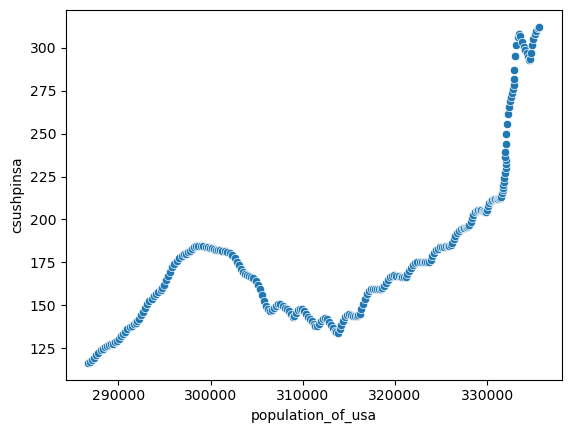

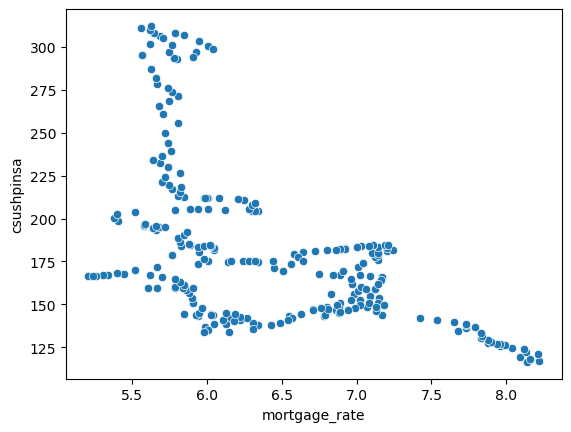

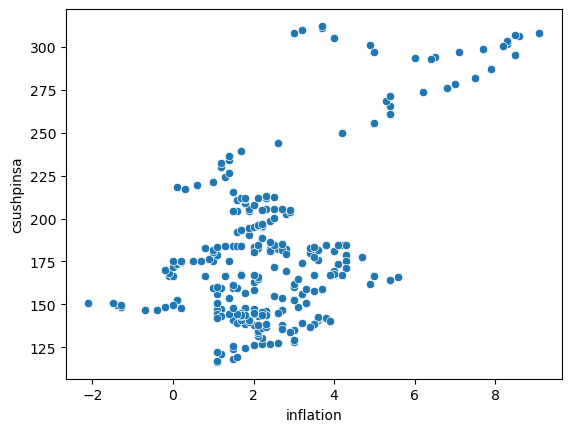

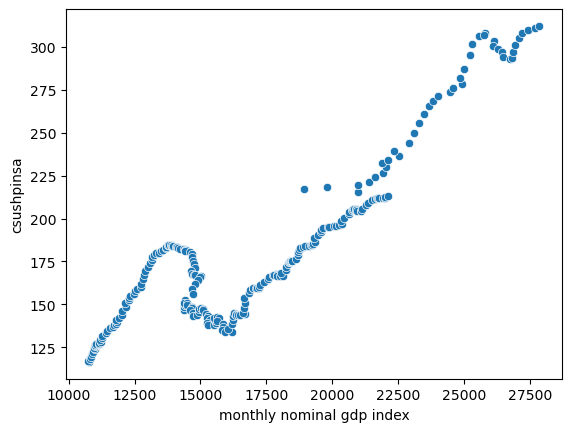

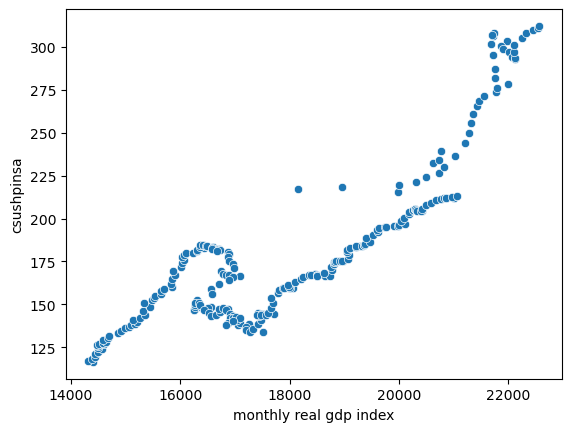

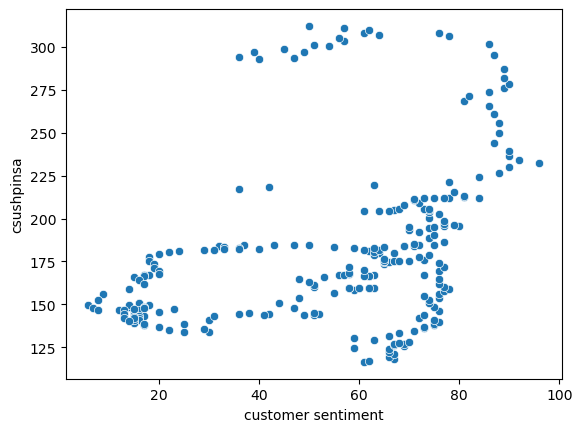

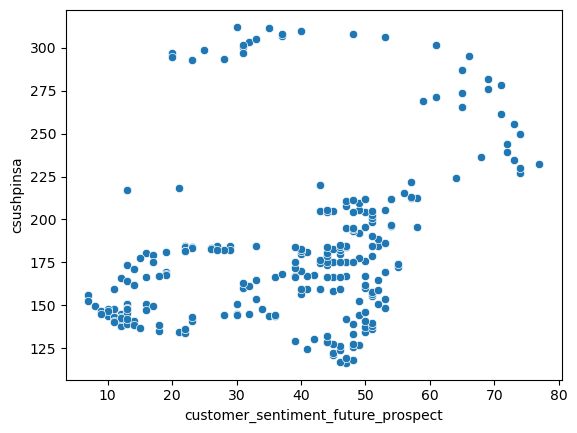

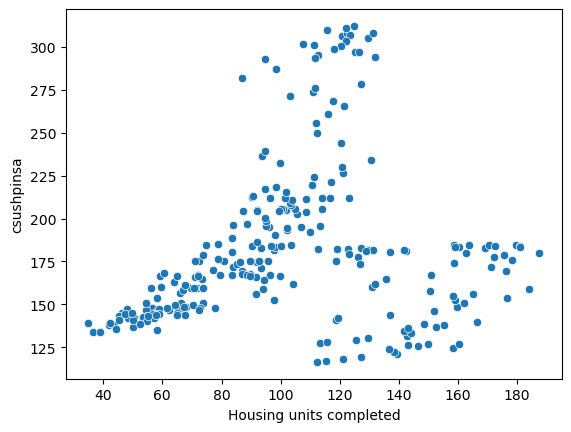

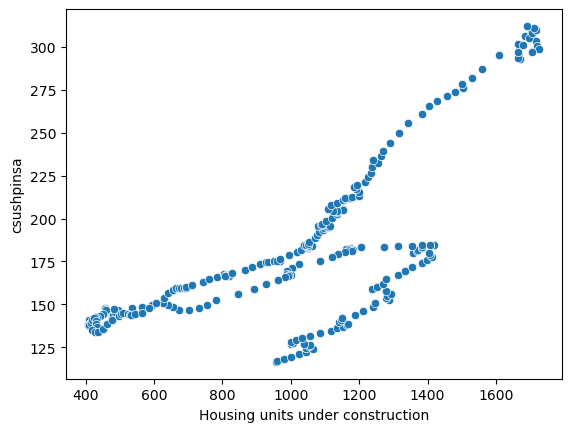

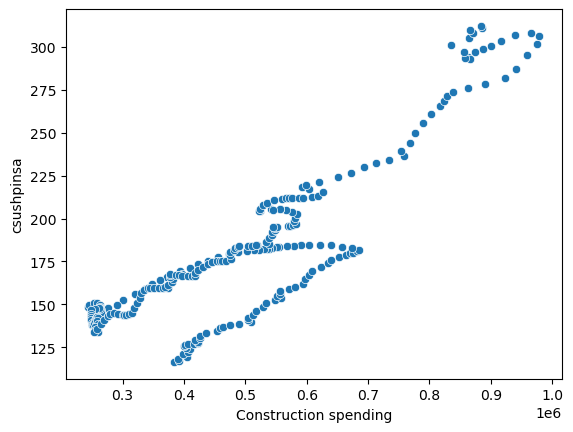

In [64]:
for i in df.columns:
    if i!='csushpinsa':
        sns.scatterplot(data=df,x=i,y='csushpinsa')
        plt.show()

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


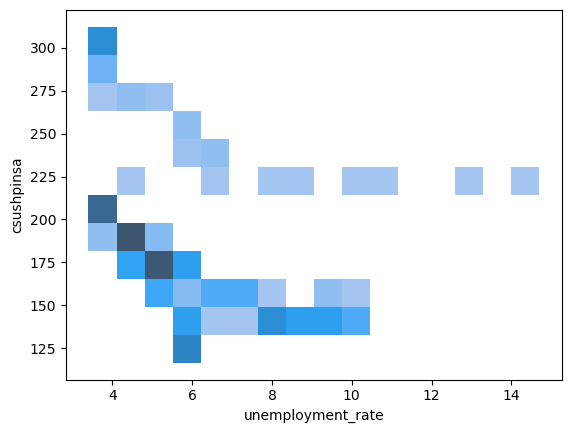

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


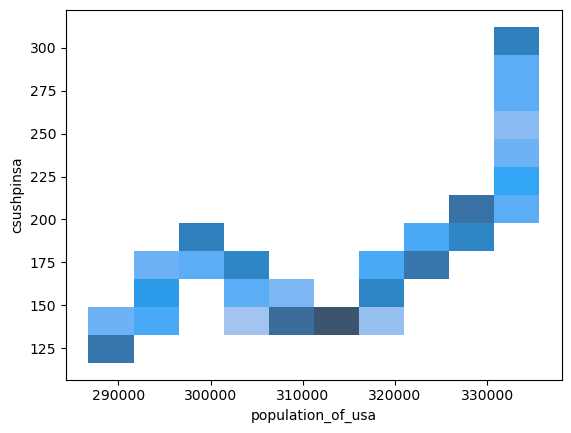

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


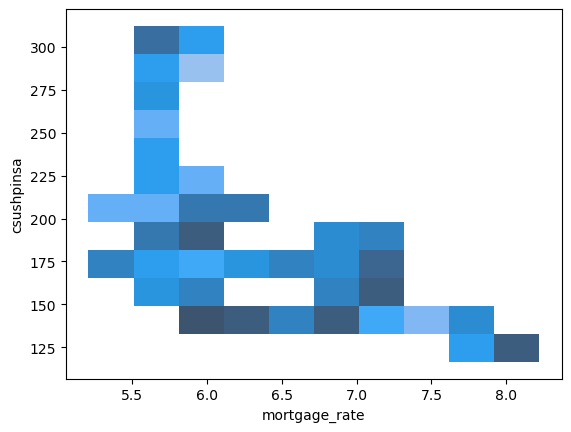

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


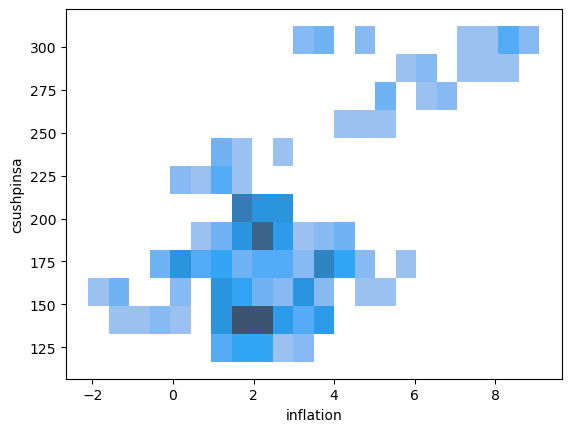

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


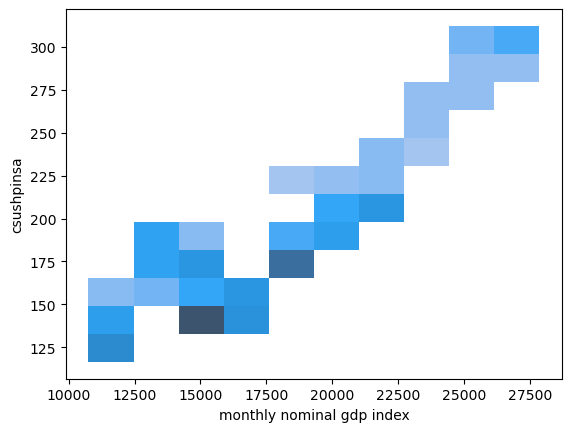

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


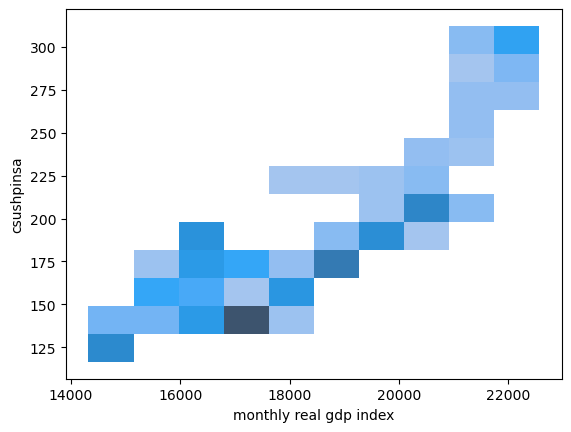

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


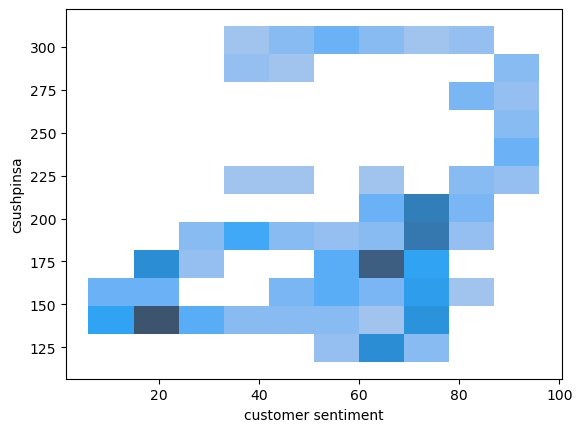

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


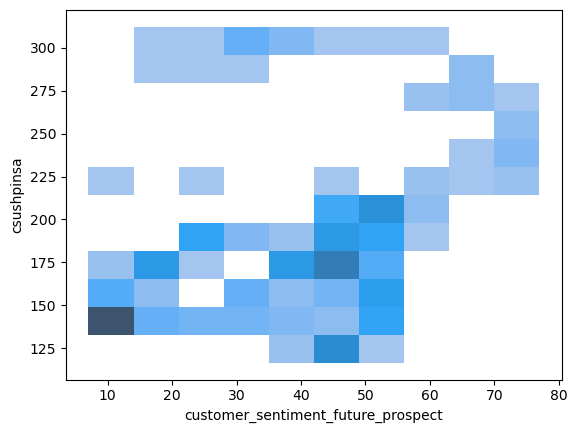

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


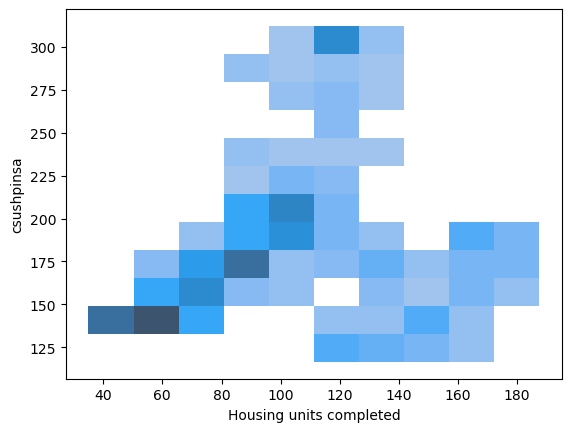

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


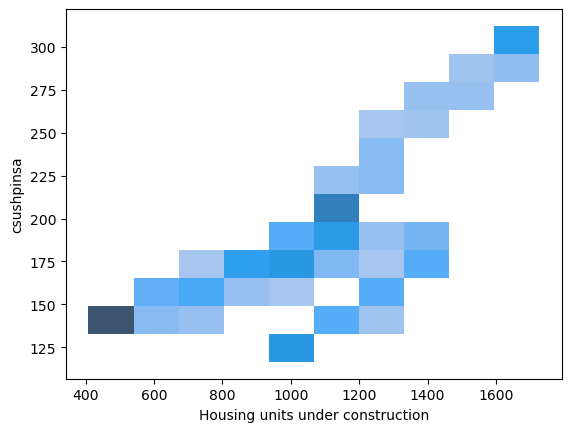

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


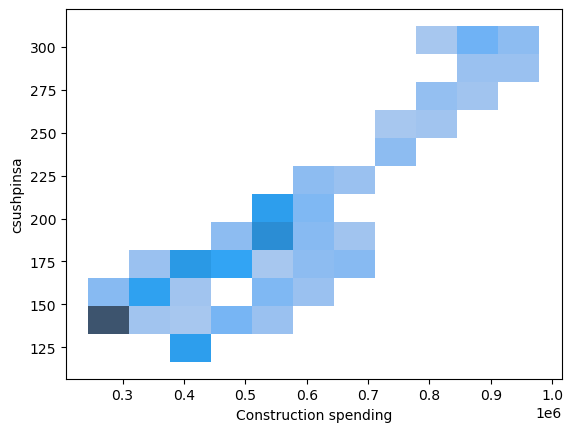

In [65]:
for i in df.columns:
    if i!='csushpinsa':
        sns.histplot(data=df,x=i,y='csushpinsa')
        plt.show()

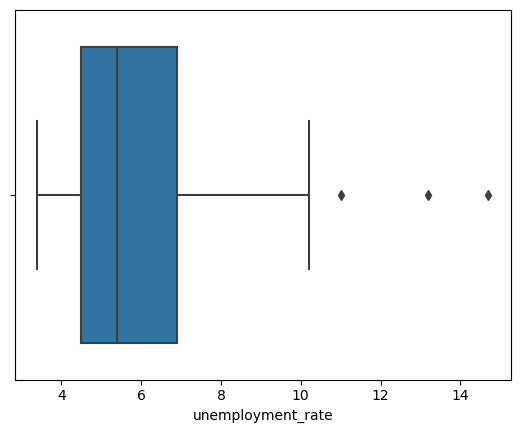

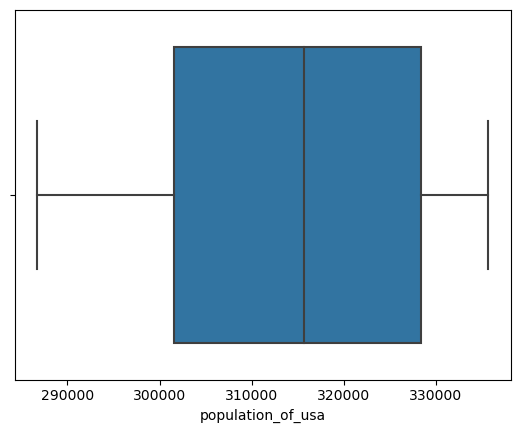

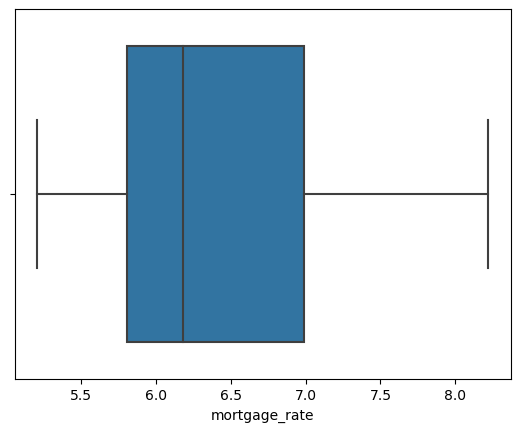

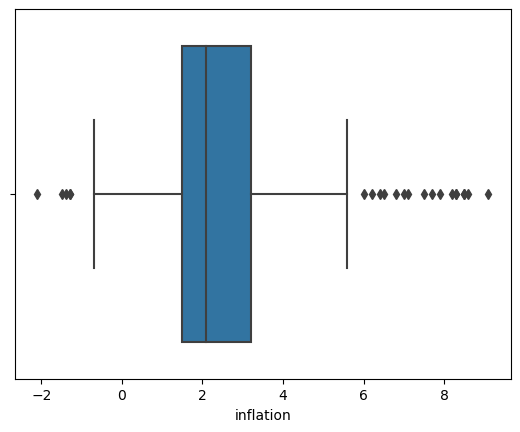

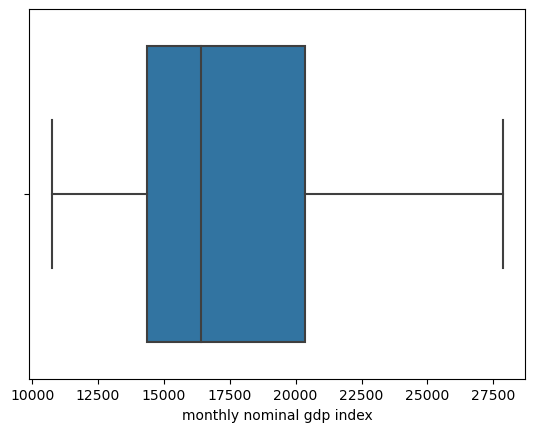

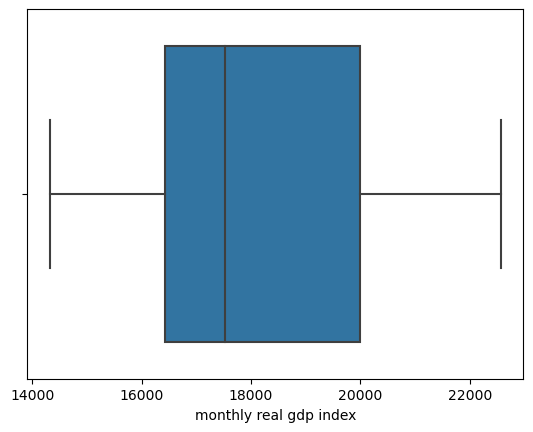

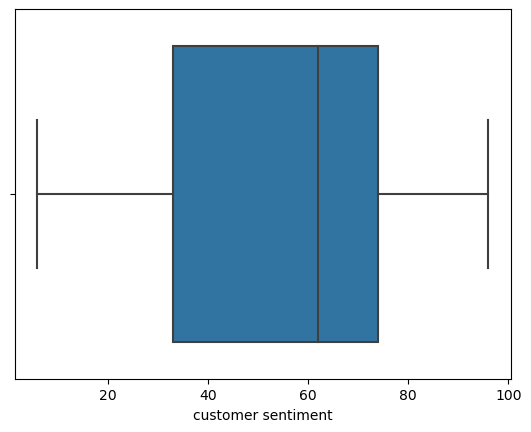

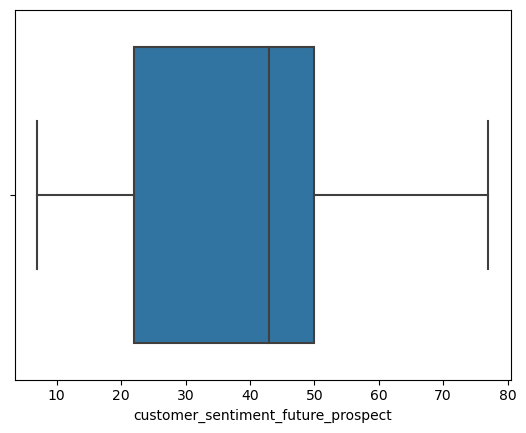

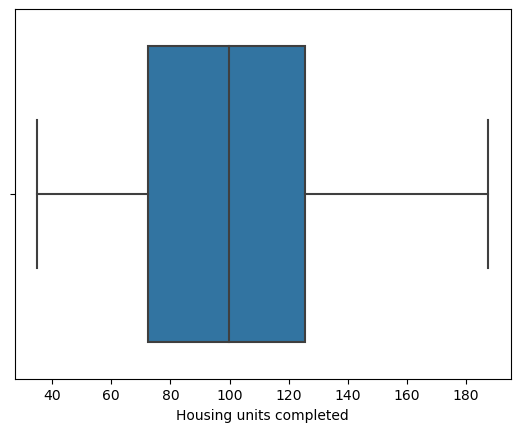

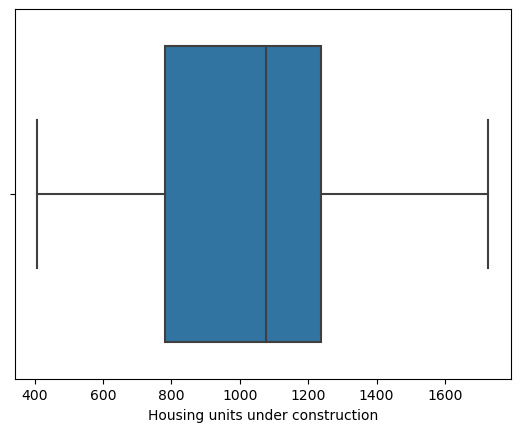

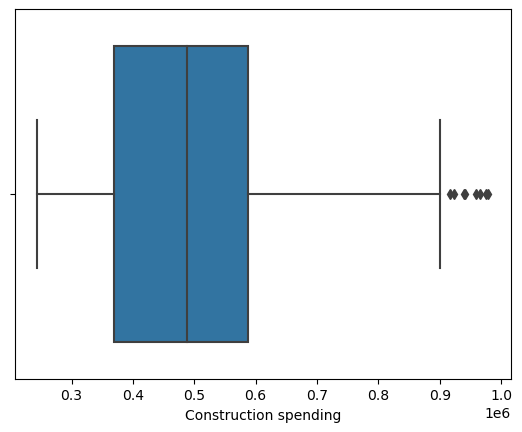

In [66]:
for i in df.columns:
    if i!='csushpinsa':
        sns.boxplot(data=df,x=i)
        plt.show()

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


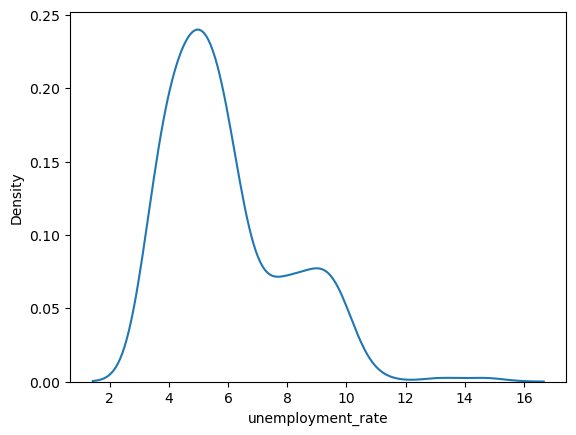

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


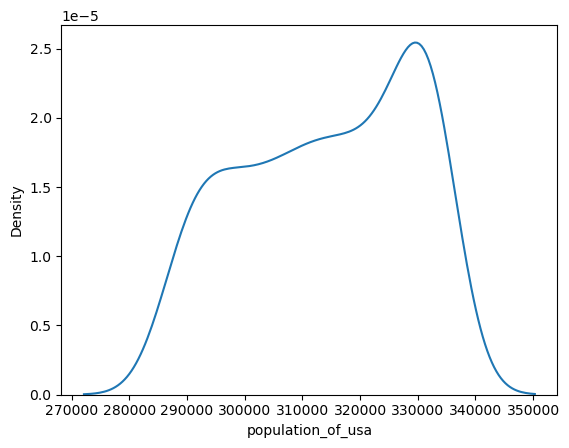

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


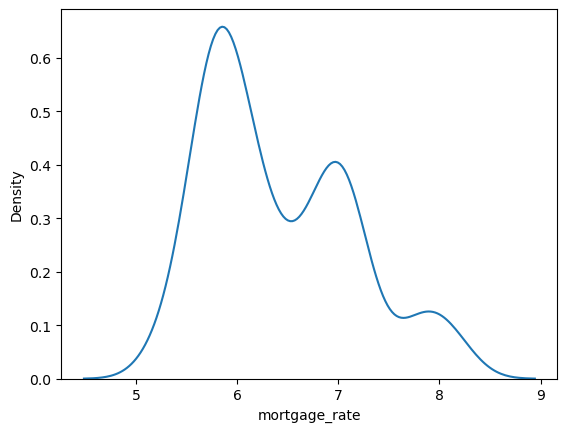

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


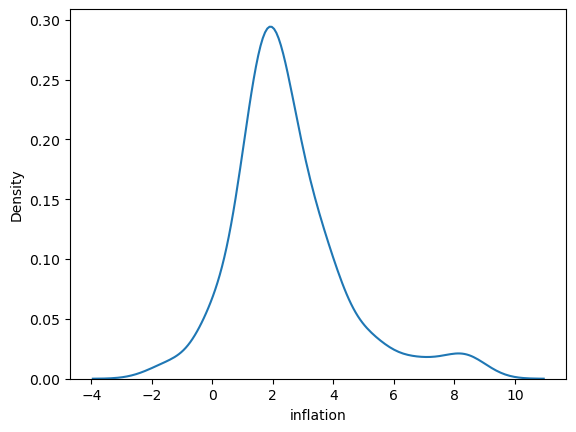

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


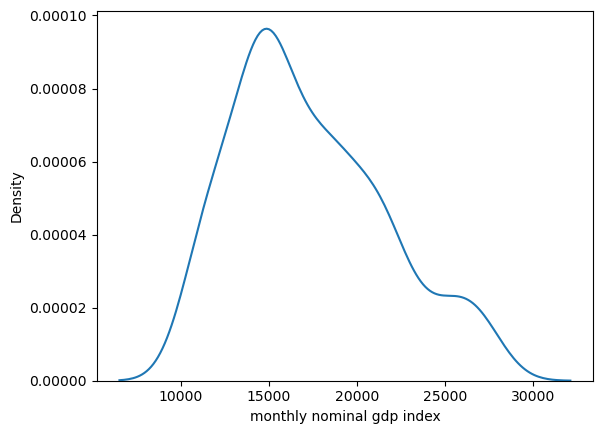

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


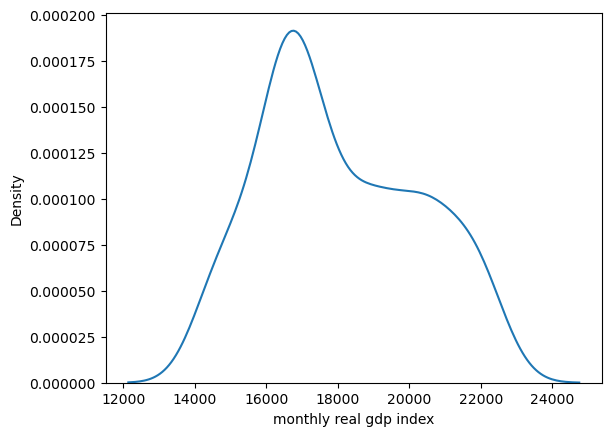

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


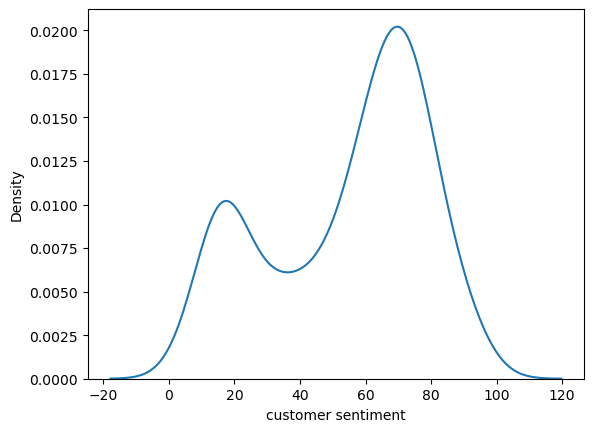

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


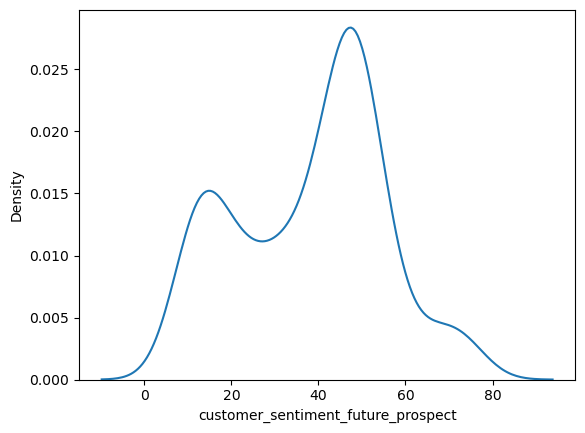

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


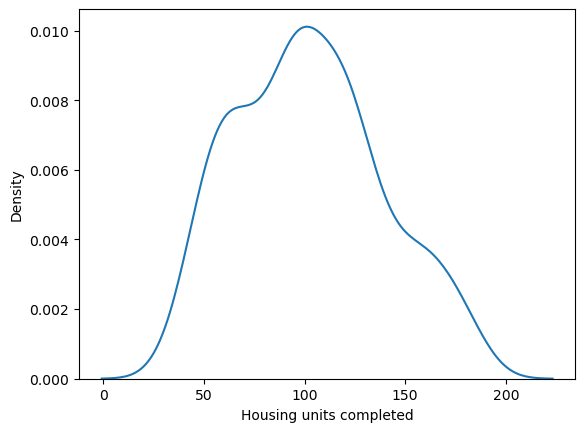

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


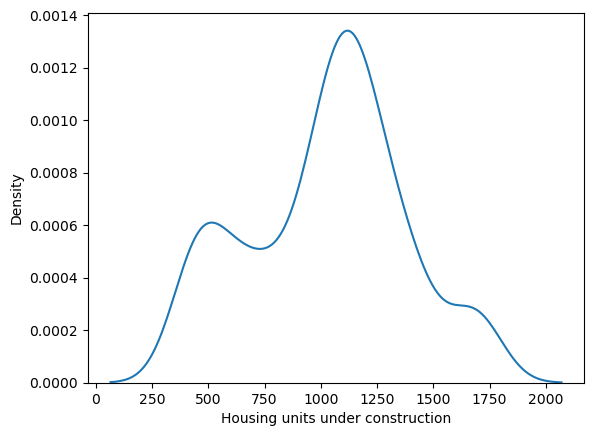

C:\Files\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


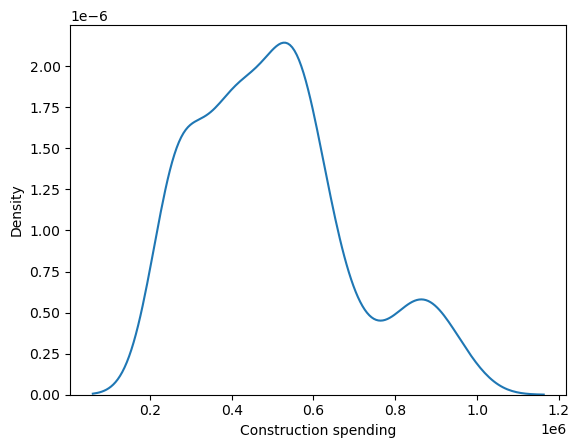

In [67]:
for i in df.columns:
    if i!='csushpinsa':
        sns.kdeplot(data=df,x=i)
        plt.show()

# 3. Model Building 

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

In [69]:
def model(x,y):
    df1=pd.DataFrame()
    df2=pd.DataFrame()
    pred=pd.DataFrame()
    algs=[]
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
    algorithms={
    'dt': DecisionTreeRegressor(),
    'rf': RandomForestRegressor(verbose=2,n_jobs=-1,warm_start=True),
    'ada': AdaBoostRegressor(),
    'gb': GradientBoostingRegressor(verbose=2),
    'xgboost': XGBRegressor(n_jobs=-1)
    }
    for key, alg in algorithms.items():
        alg.fit(xtrain, ytrain)
        pred[key]= alg.predict(xtest)
        train_pred = alg.predict(xtrain)
        df1.loc[key, 'test'] = mean_squared_error(ytest, pred[key])
        df1.loc[key, 'train'] = mean_squared_error(ytrain, train_pred)
        df2.loc[key, 'test'] = mean_absolute_error(ytest, pred[key])
        df2.loc[key, 'train'] = mean_absolute_error(ytrain, train_pred)
        algs.append(alg)
    return df1,df2,pred,xtrain,xtest,ytrain,ytest,algs

In [70]:
y=df['csushpinsa']
x=df.iloc[:,1:]

In [71]:
mse,mae,pred,xtrain,xtest,ytrain,ytest,algs=model(x,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


      Iter       Train Loss   Remaining Time 
         1        1662.7617            0.20s
         2        1357.6332            0.20s
         3        1108.5056            0.19s
         4         906.4018            0.19s
         5         742.3533            0.19s
         6         608.9157            0.20s
         7         499.5899            0.19s
         8         410.6970            0.18s
         9         338.3877            0.18s
        10         279.4681            0.18s
        11         231.4051            0.18s
        12         192.0637            0.17s
        13         160.0111            0.17s
        14         133.9918            0.17s
        15         112.5966            0.17s
        16          93.5112            0.17s
        17          77.8595            0.16s
        18          65.0900            0.16s
        19          54.8577            0.16s
        20          46.1979            0.16s
        21          39.1083            0.16s
        2

In [72]:
mse

test      train
dt       10.497343   0.000000
rf       13.758929   1.504921
ada      31.875539  18.273502
gb       10.203465   0.380469
xgboost  11.001919   0.000009

In [73]:
pred

dt         rf         ada          gb     xgboost
0   139.160  140.93906  144.257400  139.708060  138.454636
1   195.457  194.65002  195.709857  195.531138  193.853775
2   135.168  138.59482  142.795629  137.774478  137.766647
3   143.133  143.16779  142.795629  143.098315  143.122894
4   196.119  196.14884  196.984556  196.360018  196.322479
..      ...        ...         ...         ...         ...
74  175.162  177.50292  178.865167  177.559728  176.833130
75  143.053  144.64587  142.563675  144.278168  144.703064
76  171.850  170.02304  165.394375  169.770477  168.548889
77  141.946  141.79198  144.257400  141.406996  139.453659
78  185.023  186.28536  186.000524  186.033735  186.885559

[79 rows x 5 columns]

In [74]:
mae

test     train
dt       2.381405  0.000000
rf       2.109041  0.780236
ada      4.440813  3.504550
gb       2.069309  0.459211
xgboost  2.252487  0.002136

In [75]:
algs

[DecisionTreeRegressor(),
 RandomForestRegressor(n_jobs=-1, verbose=2, warm_start=True),
 AdaBoostRegressor(),
 GradientBoostingRegressor(verbose=2),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)]

# Finding the Key factors that influence the housing prices 

In [91]:
type(algs)

list

In [110]:
imp = pd.DataFrame(index=x.columns)
alg_names = [str(alg) for alg in algs]
for i,alg in zip(alg_names,algs):
    for feature, importance in zip(x.columns,alg.feature_importances_):
        imp.loc[feature,i]=importance

In [111]:
imp

DecisionTreeRegressor()  \
unemployment_rate                                  0.112658   
population_of_usa                                  0.669637   
mortgage_rate                                      0.001680   
inflation                                          0.000484   
monthly nominal gdp index                          0.020926   
monthly real gdp index                             0.167881   
customer sentiment                                 0.000595   
customer_sentiment_future_prospect                 0.000389   
Housing units completed                            0.000051   
Housing units under construction                   0.002269   
Construction spending                              0.023430   

                                    RandomForestRegressor(n_jobs=-1, verbose=2, warm_start=True)  \
unemployment_rate                                                            0.129005              
population_of_usa                                                            0.673124              
mortgage_rate                                                                0.007940              
inflation                                                                    0.020605              
monthly nominal gdp index                                                    0.066203              
monthly real gdp index                                                       0.041159              
customer sentiment                                                           0.001956              
customer_sentiment_future_prospect                                           0.001761              
Housing units completed                                                      0.000713              
Housing units under construction                                             0.022992              
Construction spending                                                        0.034541              

                                    AdaBoostRegressor()  \
unemployment_rate                              0.082081   
population_of_usa                              0.633604   
mortgage_rate                                  0.014943   
inflation                                      0.013147   
monthly nominal gdp index                      0.081851   
monthly real gdp index                         0.105320   
customer sentiment                             0.003974   
customer_sentiment_future_prospect             0.000349   
Housing units completed                        0.000085   
Housing units under construction               0.031290   
Construction spending                          0.033357   

                                    GradientBoostingRegressor(verbose=2)  \
unemployment_rate                                               0.125468   
population_of_usa                                               0.704698   
mortgage_rate                                                   0.003693   
inflation                                                       0.008780   
monthly nominal gdp index                                       0.024008   
monthly real gdp index                                          0.069163   
customer sentiment                                              0.000229   
customer_sentiment_future_prospect                              0.002144   
Housing units completed                                         0.000755   
Housing units under construction                                0.030070   
Construction spending                                           0.030991   

                                    XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, device=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=None, max_bin=None,

In [113]:
imp>0.05


DecisionTreeRegressor()  \
unemployment_rate                                      True   
population_of_usa                                      True   
mortgage_rate                                         False   
inflation                                             False   
monthly nominal gdp index                             False   
monthly real gdp index                                 True   
customer sentiment                                    False   
customer_sentiment_future_prospect                    False   
Housing units completed                               False   
Housing units under construction                      False   
Construction spending                                 False   

                                    RandomForestRegressor(n_jobs=-1, verbose=2, warm_start=True)  \
unemployment_rate                                                                True              
population_of_usa                                                                True              
mortgage_rate                                                                   False              
inflation                                                                       False              
monthly nominal gdp index                                                        True              
monthly real gdp index                                                          False              
customer sentiment                                                              False              
customer_sentiment_future_prospect                                              False              
Housing units completed                                                         False              
Housing units under construction                                                False              
Construction spending                                                           False              

                                    AdaBoostRegressor()  \
unemployment_rate                                  True   
population_of_usa                                  True   
mortgage_rate                                     False   
inflation                                         False   
monthly nominal gdp index                          True   
monthly real gdp index                             True   
customer sentiment                                False   
customer_sentiment_future_prospect                False   
Housing units completed                           False   
Housing units under construction                  False   
Construction spending                             False   

                                    GradientBoostingRegressor(verbose=2)  \
unemployment_rate                                                   True   
population_of_usa                                                   True   
mortgage_rate                                                      False   
inflation                                                          False   
monthly nominal gdp index                                          False   
monthly real gdp index                                              True   
customer sentiment                                                 False   
customer_sentiment_future_prospect                                 False   
Housing units completed                                            False   
Housing units under construction                                   False   
Construction spending                                              False   

                                    XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, device=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=None, max_bin=None,

From the above table we can find the key factors that influence the house price

In [80]:
key_factors=['unemployment_rate','population_of_usa','inflation','monthly nominal gdp index']

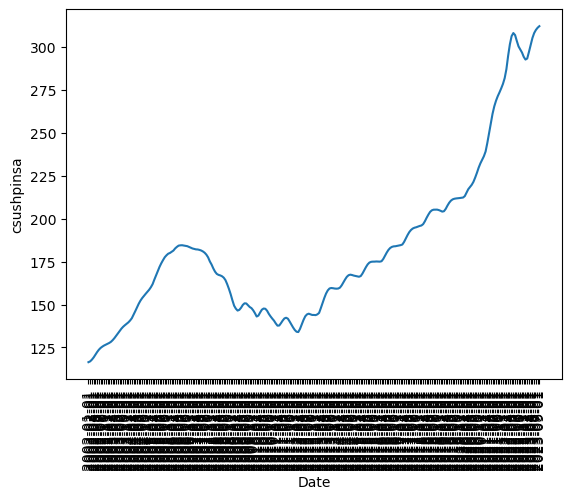

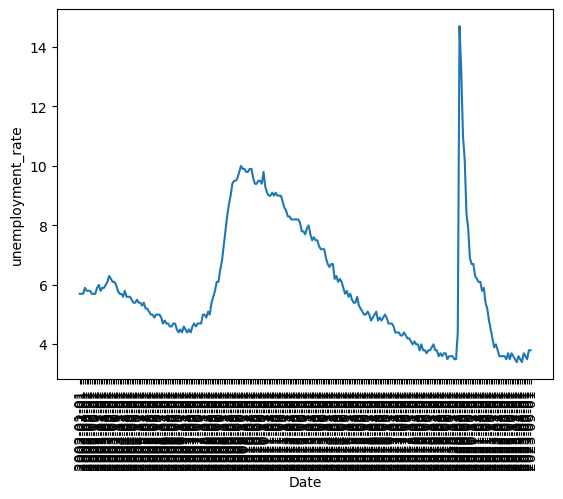

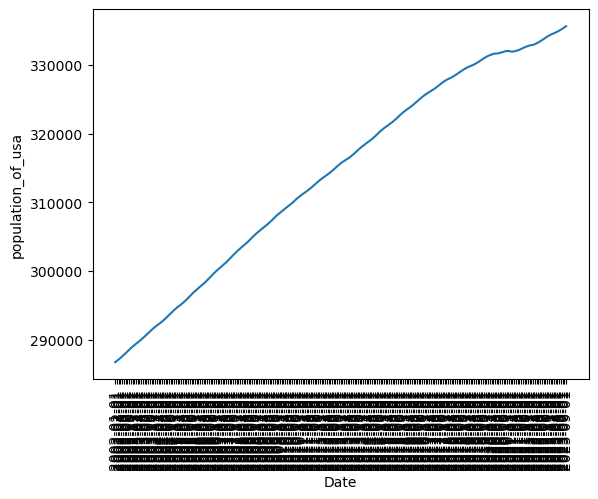

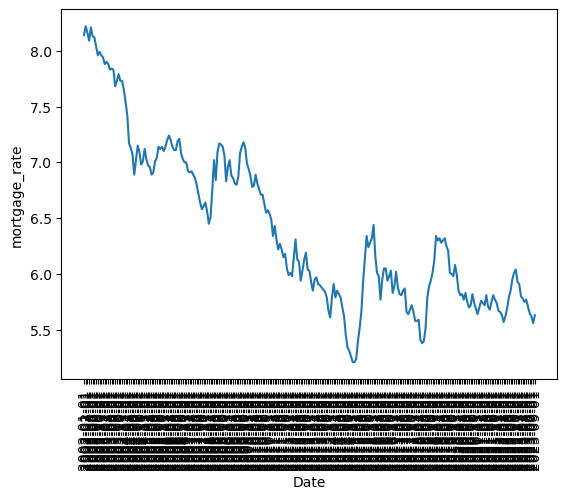

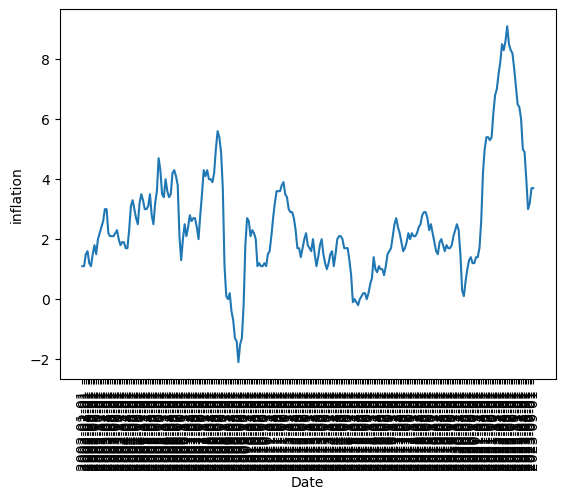

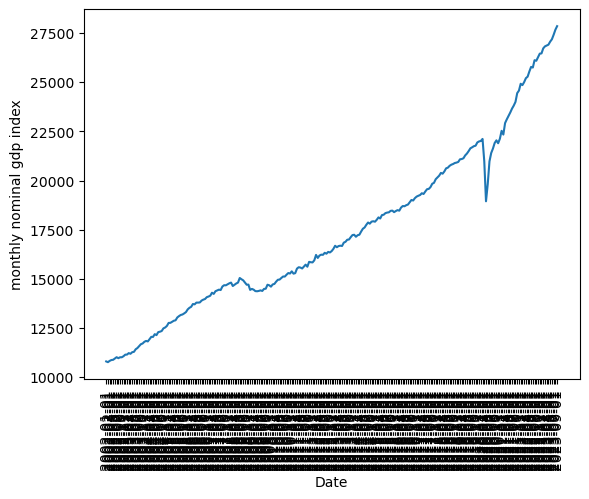

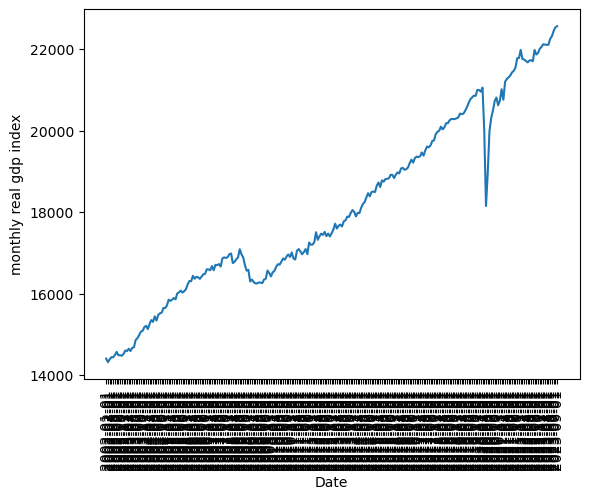

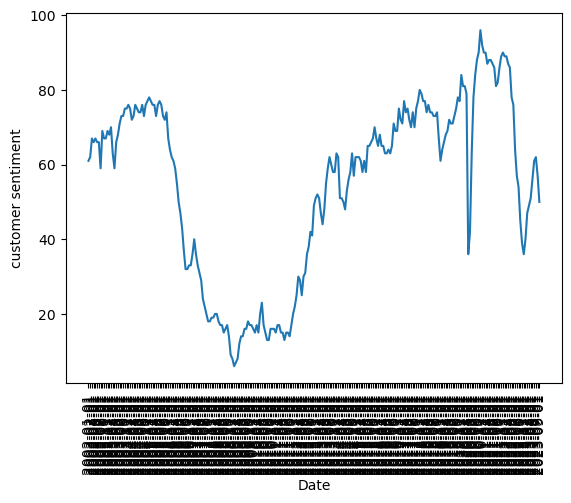

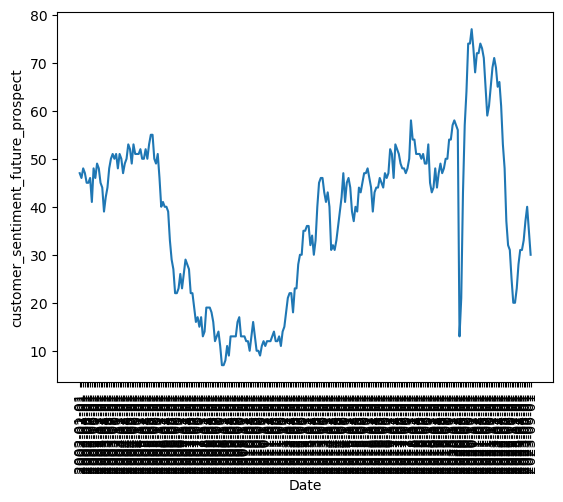

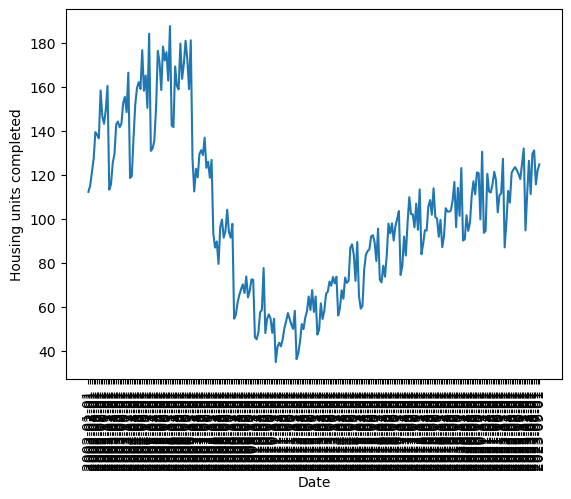

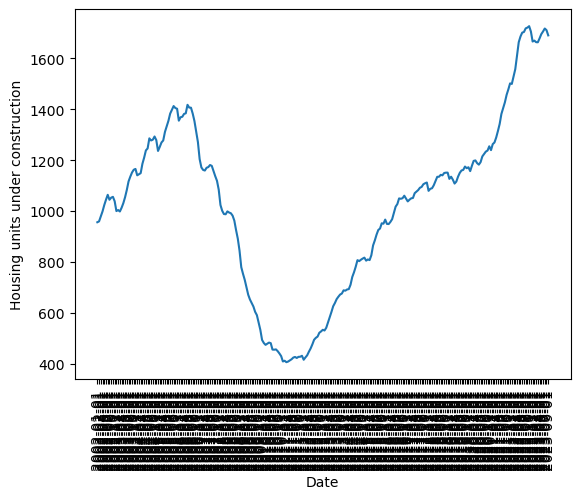

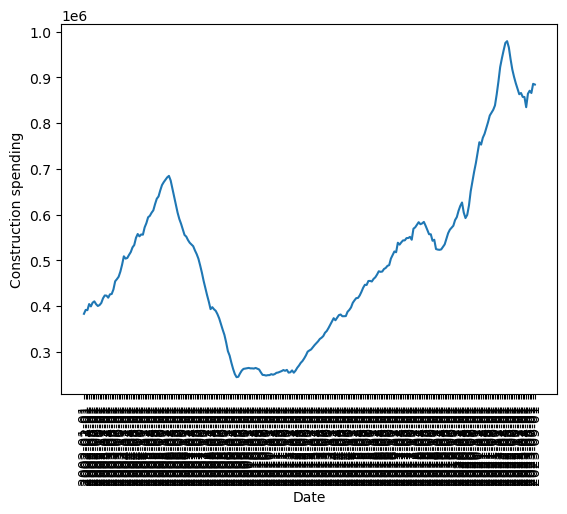

In [81]:
for i in imp.index:
    plt.plot(house_price['date'],house_price[i])
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel(i)
    plt.show()

In [82]:
house_price[['csushpinsa'] + key_factors].corr()

csushpinsa  unemployment_rate  population_of_usa  \
csushpinsa                   1.000000          -0.509437           0.728184   
unemployment_rate           -0.509437           1.000000          -0.203304   
population_of_usa            0.728184          -0.203304           1.000000   
inflation                    0.598620          -0.423239           0.168503   
monthly nominal gdp index    0.895759          -0.365213           0.945802   

                           inflation  monthly nominal gdp index  
csushpinsa                  0.598620                   0.895759  
unemployment_rate          -0.423239                  -0.365213  
population_of_usa           0.168503                   0.945802  
inflation                   1.000000                   0.388701  
monthly nominal gdp index   0.388701                   1.000000

<Axes: >

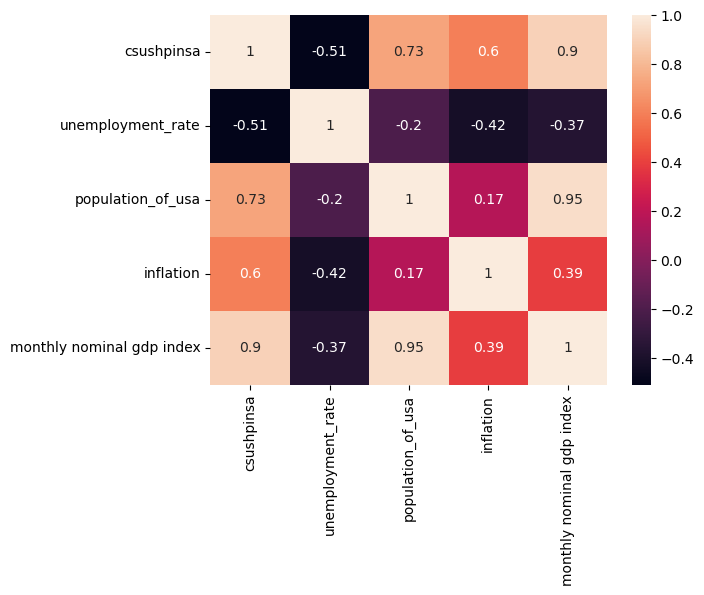

In [83]:
sns.heatmap(house_price[['csushpinsa'] + key_factors].corr(),annot=True)